# 5. Training model- Binary Classifier

<hr style="border:2px solid black"> </hr>

SVM(Linear), Logistic Regression, Decision Tree, Random Forest



In [1]:
# Load the processed data in file 'Data_structure_and_processing.ipynb'

import dill
dill.load_session('Data_structure_and_processing.db')

<hr style="border:2px solid black"> </hr>

### 4.4 Binary Classifier (Female: CN vs. MCI )

__CN:__ 1.0 (Cognitively Normal)  
__MCI:__ 2.0 (Mild Cognitive Impairment)

__Data:__
- __female_CN_MCI__: CN, MCI data for all female


- __female_CN_MCI_train__: After stratified sampling, the cleaned female's CN, MCI training set
- __female_CN_MCI_train_labels__: After stratified sampling, the cleaned female's CN, MCI training set labels


- __female_CN_MCI_test__: After stratified sampling, the cleaned female's CN, MCI testing set
- __female_CN_MCI_test_labels__: After stratified sampling, the cleaned female's CN, MCI testing set labels    

In [2]:
# Simplified name

x_train01 = female_CN_MCI_train
y_train01 = female_CN_MCI_train_labels
x_test01 = female_CN_MCI_test
y_test01 = female_CN_MCI_test_labels

<hr style="border:px solid black"> </hr>

### 4.1.1 SVM (Linear)
---
- __Baseline__

In [3]:
# ======================
# Training set
# Male ( CN VS. MCI )
# ======================


svm_clf01 = SVC(kernel="linear", random_state=42)
start = time.process_time()
svm_clf01.fit(x_train01, y_train01)

pred = cross_val_predict(svm_clf01, x_train01, y_train01, cv=10, n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train01, pred))
print(classification_report(y_train01, pred))

Time:  27.078125
[[143  34]
 [ 36  45]]
              precision    recall  f1-score   support

         1.0       0.80      0.81      0.80       177
         2.0       0.57      0.56      0.56        81

    accuracy                           0.73       258
   macro avg       0.68      0.68      0.68       258
weighted avg       0.73      0.73      0.73       258



In [4]:
# ======================
# Testing set
# Male ( CN VS. MCI )
# ======================


start = time.process_time()

pred = cross_val_predict(svm_clf01, x_test01, y_test01, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test01, pred))
print(classification_report(y_test01, pred))

Time:  0.328125
[[41  4]
 [ 8 12]]
              precision    recall  f1-score   support

         1.0       0.84      0.91      0.87        45
         2.0       0.75      0.60      0.67        20

    accuracy                           0.82        65
   macro avg       0.79      0.76      0.77        65
weighted avg       0.81      0.82      0.81        65



---
- __Feature Selection - RFECV (SVM - Linear)__

Optimal number of features : 280
Time:  4184.296875


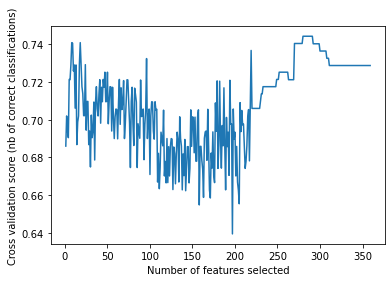

In [27]:
# ======================
# SVM (Linear) - RFECV
# Male ( CN VS. MCI )
# ======================

svm_clf02 = SVC(kernel="linear", random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_svm01 = RFECV(estimator=svm_clf02, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_svm01.fit(x_train01, y_train01)
rfecv_svm01_x_train01 = rfecv_svm01.transform(x_train01)
rfecv_svm01_x_test01 = rfecv_svm01.transform(x_test01)


print("Optimal number of features : %d" % rfecv_svm01.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_svm01.grid_scores_) + min_features_to_select),
         rfecv_svm01.grid_scores_)
plt.show()

In [28]:
cols = rfecv_svm01.get_support(indices=True)
x_train_new = x_train01.iloc[:,cols]

x_train_new.columns.values.tolist()      # Optimal feature's name

['lh.caudalanteriorcingulate.thickness',
 'lh.cuneus.thickness',
 'lh.entorhinal.thickness',
 'lh.fusiform.thickness',
 'lh.lateraloccipital.thickness',
 'lh.lateralorbitofrontal.thickness',
 'lh.lingual.thickness',
 'lh.medialorbitofrontal.thickness',
 'lh.middletemporal.thickness',
 'lh.parahippocampal.thickness',
 'lh.parsorbitalis.thickness',
 'lh.pericalcarine.thickness',
 'lh.postcentral.thickness',
 'lh.precentral.thickness',
 'lh.rostralanteriorcingulate.thickness',
 'lh.superiorparietal.thickness',
 'lh.superiortemporal.thickness',
 'lh.frontalpole.thickness',
 'lh.temporalpole.thickness',
 'rh.caudalanteriorcingulate.thickness',
 'rh.entorhinal.thickness',
 'rh.inferiorparietal.thickness',
 'rh.isthmuscingulate.thickness',
 'rh.lateraloccipital.thickness',
 'rh.lateralorbitofrontal.thickness',
 'rh.lingual.thickness',
 'rh.medialorbitofrontal.thickness',
 'rh.parahippocampal.thickness',
 'rh.paracentral.thickness',
 'rh.parsorbitalis.thickness',
 'rh.parstriangularis.thicknes

---
- __Only use the data after RFECV__

In [29]:
# ======================
# Training set ( After RFECV)
# Male ( CN VS. MCI )
# ======================

svm_clf03 = SVC(kernel="linear", random_state=42)
start = time.process_time()
svm_clf03.fit(rfecv_svm01_x_train01, y_train01)

pred = cross_val_predict(svm_clf03, rfecv_svm01_x_train01, y_train01, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train01, pred))
print(classification_report(y_train01, pred))

Time:  34.53125
[[142  35]
 [ 35  46]]
              precision    recall  f1-score   support

         1.0       0.80      0.80      0.80       177
         2.0       0.57      0.57      0.57        81

    accuracy                           0.73       258
   macro avg       0.69      0.69      0.69       258
weighted avg       0.73      0.73      0.73       258



In [30]:
# ======================
# Testing set (After RFECV)
# Male ( CN VS. MCI )
# ======================

start = time.process_time()

pred = cross_val_predict(svm_clf03, rfecv_svm01_x_test01, y_test01, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test01, pred))
print(classification_report(y_test01, pred))

Time:  0.0
[[41  4]
 [ 8 12]]
              precision    recall  f1-score   support

         1.0       0.84      0.91      0.87        45
         2.0       0.75      0.60      0.67        20

    accuracy                           0.82        65
   macro avg       0.79      0.76      0.77        65
weighted avg       0.81      0.82      0.81        65



---
- __RFECV (SVM) + Feature scaling + PCA__

In [120]:
# ======================
# Training set
# Male ( CN VS. MCI )
# ======================


svm_clf04 = SVC(kernel="linear", random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_svm01_x_train01)

# Dimension reduction
pca = PCA(n_components=0.955)  # n_components
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

#print (pca.explained_variance_ratio_)
#print (pca.explained_variance_)
print ("Components:",pca.n_components_)

svm_clf04.fit(x_train_scaled_reduced, y_train01)


pred = cross_val_predict(svm_clf04, x_train_scaled_reduced, y_train01, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train01, pred))
print(classification_report(y_train01, pred))

Components: 102
Time:  0.765625
[[144  33]
 [ 34  47]]
              precision    recall  f1-score   support

         1.0       0.81      0.81      0.81       177
         2.0       0.59      0.58      0.58        81

    accuracy                           0.74       258
   macro avg       0.70      0.70      0.70       258
weighted avg       0.74      0.74      0.74       258



Text(0, 0.5, 'cumulative explained variance')

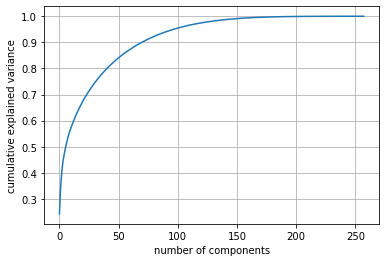

In [36]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [119]:
# =======================
# Testing set
# Male ( CN VS. MCI )
# =======================


start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(rfecv_svm01_x_test01)

# Dimension reduction
pca = PCA(n_components=0.955)
x_test_scaled_reduced = pca.fit_transform(x_test_scaled)

print ("Components:",pca.n_components_)

# confusion matrix
pred = cross_val_predict(svm_clf04, x_test_scaled_reduced, y_test01, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test01, pred))
print(classification_report(y_test01, pred))

Components: 47
Time:  0.109375
[[39  6]
 [ 4 16]]
              precision    recall  f1-score   support

         1.0       0.91      0.87      0.89        45
         2.0       0.73      0.80      0.76        20

    accuracy                           0.85        65
   macro avg       0.82      0.83      0.82        65
weighted avg       0.85      0.85      0.85        65



<hr style="border:px solid black"> </hr>

## 4.1.2 Logistic Regression

- __Baseline__

In [200]:
# =======================
# Training set
# Male ( CN VS. MCI )
# =======================


log_reg01 = LogisticRegression(max_iter=60000, penalty='l2', random_state=42)
start = time.process_time()
log_reg01.fit(x_train01, y_train01)

pred = cross_val_predict(log_reg01, x_train01, y_train01, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train01, pred))
print(classification_report(y_train01, pred))

Time:  128.375
[[138  39]
 [ 36  45]]
              precision    recall  f1-score   support

         1.0       0.79      0.78      0.79       177
         2.0       0.54      0.56      0.55        81

    accuracy                           0.71       258
   macro avg       0.66      0.67      0.67       258
weighted avg       0.71      0.71      0.71       258



In [201]:
# =======================
# Testing set
# Male ( CN VS. MCI )
# =======================


start = time.process_time()

pred = cross_val_predict(log_reg01, x_test01, y_test01, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test01, pred))
print(classification_report(y_test01, pred))

Time:  8.734375
[[39  6]
 [ 5 15]]
              precision    recall  f1-score   support

         1.0       0.89      0.87      0.88        45
         2.0       0.71      0.75      0.73        20

    accuracy                           0.83        65
   macro avg       0.80      0.81      0.80        65
weighted avg       0.83      0.83      0.83        65



---
- __Feature Selection - RFECV (Logistic Regression)__

C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Optimal number of features : 17
Time:  3005.53125


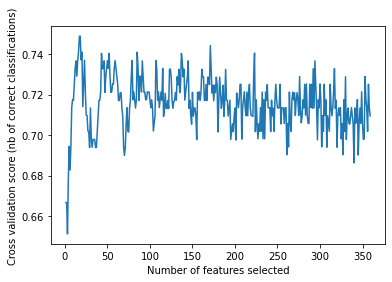

In [159]:
# ==============================
# Male ( CN VS. MCI )
# Logistic Regression - RFECV
# ==============================


log_reg02 = LogisticRegression(max_iter=100000000, penalty='l2', random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_lr01 = RFECV(estimator=log_reg02, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_lr01.fit(x_train01, y_train01)
rfecv_lr01_x_train01 = rfecv_lr01.transform(x_train01)
rfecv_lr01_x_test01 = rfecv_lr01.transform(x_test01)


print("Optimal number of features : %d" % rfecv_lr01.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_lr01.grid_scores_) + min_features_to_select),
         rfecv_lr01.grid_scores_)
plt.show()

In [160]:
cols = rfecv_lr01.get_support(indices=True)
x_train_new = x_train01.iloc[:,cols]

x_train_new.columns.values.tolist()      # Optimal feature's name

['lh.parahippocampal.volume',
 'lh.posteriorcingulate.volume',
 'lh.frontalpole.volume',
 'rh.lateralorbitofrontal.volume',
 'rh.parsorbitalis.volume',
 'rh.pericalcarine.volume',
 'lh.fusiform.area',
 'lh.lateralorbitofrontal.area',
 'lh.temporalpole.area',
 'rh.parsorbitalis.area',
 'rh.insula.area',
 'Left.Hippocampus',
 'CSF',
 'CC_Posterior',
 'left.CA1',
 'left.fimbria',
 'left.hippocampal.fissure']

---
- __Only use the data after RFECV__

In [161]:
# =======================
# Training set (RFECV)
# Male ( CN VS. MCI )
# =======================


log_reg03 = LogisticRegression(max_iter=60000, penalty='l2', random_state=42)
start = time.process_time()
log_reg03.fit(rfecv_lr01_x_train01, y_train01)

pred = cross_val_predict(log_reg03, rfecv_lr01_x_train01, y_train01, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train01, pred))
print(classification_report(y_train01, pred))

Time:  0.09375
[[153  24]
 [ 26  55]]
              precision    recall  f1-score   support

         1.0       0.85      0.86      0.86       177
         2.0       0.70      0.68      0.69        81

    accuracy                           0.81       258
   macro avg       0.78      0.77      0.77       258
weighted avg       0.80      0.81      0.81       258



In [162]:
# =======================
# rfecv - test set
# =======================


start = time.process_time()

pred = cross_val_predict(log_reg03, rfecv_lr01_x_test01, y_test01, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test01, pred))
print(classification_report(y_test01, pred))

Time:  0.015625
[[38  7]
 [ 7 13]]
              precision    recall  f1-score   support

         1.0       0.84      0.84      0.84        45
         2.0       0.65      0.65      0.65        20

    accuracy                           0.78        65
   macro avg       0.75      0.75      0.75        65
weighted avg       0.78      0.78      0.78        65



---
- __RFECV (Logistic Regression) + Feature scaling + PCA__

In [197]:
# =======================
##### train set
# =======================


log_reg04 = LogisticRegression(max_iter=60000, penalty='l2', random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_lr01_x_train01)

# Dimension reduction
pca = PCA(n_components=0.8)
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print ("Components:",pca.n_components_)

log_reg04.fit(x_train_scaled_reduced, y_train01)

pred = cross_val_predict(log_reg04, x_train_scaled_reduced, y_train01, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(y_train01, pred))
print(classification_report(y_train01, pred))

Components: 10
Times:  0.375
Confusion matrix: 
 [[152  25]
 [ 37  44]]
              precision    recall  f1-score   support

         1.0       0.80      0.86      0.83       177
         2.0       0.64      0.54      0.59        81

    accuracy                           0.76       258
   macro avg       0.72      0.70      0.71       258
weighted avg       0.75      0.76      0.75       258



In [196]:
# =======================
# test set
# =======================


start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_lr01_x_test01)

# Dimension reduction
pca = PCA(n_components=0.8)
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print ("Components:",pca.n_components_)

pred = cross_val_predict(log_reg04, x_train_scaled_reduced, y_test01, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(y_test01, pred))
print(classification_report(y_test01, pred))

Components: 8
Times:  0.03125
Confusion matrix: 
 [[41  4]
 [ 8 12]]
              precision    recall  f1-score   support

         1.0       0.84      0.91      0.87        45
         2.0       0.75      0.60      0.67        20

    accuracy                           0.82        65
   macro avg       0.79      0.76      0.77        65
weighted avg       0.81      0.82      0.81        65



<hr style="border:px solid black"> </hr>

### 4.1.3 Decision Tree
- __Baseline__

In [7]:
# =======================
# Training set
# Male ( CN VS. MCI )
# =======================


tree_clf01 = DecisionTreeClassifier(random_state=42)
start = time.process_time()
tree_clf01.fit(x_train01, y_train01)

pred = cross_val_predict(tree_clf01, x_train01, y_train01, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train01, pred))
print(classification_report(y_train01, pred))

Time:  0.34375
[[137  40]
 [ 42  39]]
              precision    recall  f1-score   support

         1.0       0.77      0.77      0.77       177
         2.0       0.49      0.48      0.49        81

    accuracy                           0.68       258
   macro avg       0.63      0.63      0.63       258
weighted avg       0.68      0.68      0.68       258



In [8]:
# =======================
# Testing set
# Male ( CN VS. MCI )
# =======================


start = time.process_time()

pred = cross_val_predict(tree_clf01, x_test01, y_test01, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test01, pred))
print(classification_report(y_test01, pred))

Time:  0.109375
[[34 11]
 [10 10]]
              precision    recall  f1-score   support

         1.0       0.77      0.76      0.76        45
         2.0       0.48      0.50      0.49        20

    accuracy                           0.68        65
   macro avg       0.62      0.63      0.63        65
weighted avg       0.68      0.68      0.68        65



---
- __Feature Selection - RFECV (Decision Tree)__

Optimal number of features : 355
Time:  0.1875


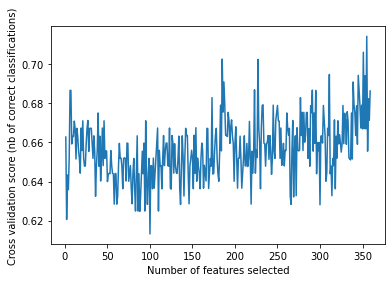

In [3]:
# =======================
# Female ( CN VS. MCI )
# Decision Tree - RFECV
# =======================


tree_clf02 = DecisionTreeClassifier(random_state=43)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_tree01 = RFECV(estimator=tree_clf02, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_tree01.fit(x_train01, y_train01)
rfecv_tree01_x_train01 = rfecv_tree01.transform(x_train01)
rfecv_tree01_x_test01 = rfecv_tree01.transform(x_test01)


print("Optimal number of features : %d" % rfecv_tree01.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_tree01.grid_scores_) + min_features_to_select),
         rfecv_tree01.grid_scores_)
plt.show()

In [130]:
cols = rfecv_tree01.get_support(indices=True)
x_train_new01 = x_train01.iloc[:,cols]

x_train_new01.columns.values.tolist()      # Optimal feature's name

['lh.entorhinal.thickness',
 'lh.fusiform.thickness',
 'lh.inferiorparietal.thickness',
 'lh.inferiortemporal.thickness',
 'lh.isthmuscingulate.thickness',
 'lh.lateraloccipital.thickness',
 'lh.lateralorbitofrontal.thickness',
 'lh.lingual.thickness',
 'lh.medialorbitofrontal.thickness',
 'lh.middletemporal.thickness',
 'lh.parahippocampal.thickness',
 'lh.paracentral.thickness',
 'lh.parsopercularis.thickness',
 'lh.parsorbitalis.thickness',
 'lh.parstriangularis.thickness',
 'lh.pericalcarine.thickness',
 'lh.postcentral.thickness',
 'lh.posteriorcingulate.thickness',
 'lh.precentral.thickness',
 'lh.precuneus.thickness',
 'lh.rostralanteriorcingulate.thickness',
 'lh.rostralmiddlefrontal.thickness',
 'lh.superiorfrontal.thickness',
 'lh.superiorparietal.thickness',
 'lh.superiortemporal.thickness',
 'lh.supramarginal.thickness',
 'lh.frontalpole.thickness',
 'lh.temporalpole.thickness',
 'lh.transversetemporal.thickness',
 'lh.insula.thickness',
 'lh.MeanThickness.thickness',
 'rh.

---
- feature importances

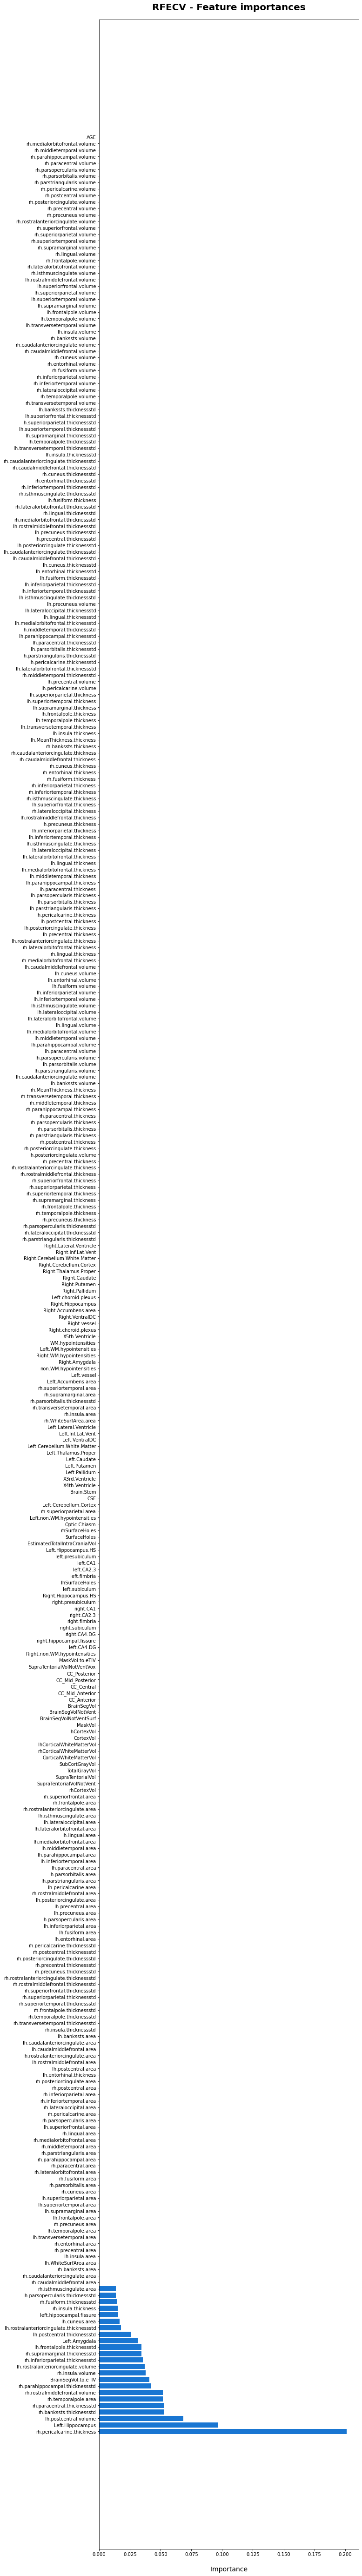

In [131]:
dset = pd.DataFrame()
dset['attr'] = x_train_new01.columns.values
dset['importance'] = rfecv_tree01.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 100))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

---
- __Only use the data after RFECV__

In [128]:
# =========================
# Training set (RFECV)
# Female ( CN VS. MCI )
# =========================


tree_clf03 = DecisionTreeClassifier(random_state=42)
start = time.process_time()
tree_clf03.fit(rfecv_svm01_x_train01, y_train01)

pred = cross_val_predict(tree_clf03, rfecv_tree01_x_train01, y_train01, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train01, pred))
print(classification_report(y_train01, pred))

Time:  0.046875
[[134  43]
 [ 44  37]]
              precision    recall  f1-score   support

         1.0       0.75      0.76      0.75       177
         2.0       0.46      0.46      0.46        81

    accuracy                           0.66       258
   macro avg       0.61      0.61      0.61       258
weighted avg       0.66      0.66      0.66       258



In [129]:
# =========================
# Testing set (RFECV)
# Female ( CN VS. MCI )
# =========================


start = time.process_time()

pred = cross_val_predict(tree_clf03, rfecv_tree01_x_test01, y_test01, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test01, pred))
print(classification_report(y_test01, pred))

Time:  0.015625
[[35 10]
 [ 8 12]]
              precision    recall  f1-score   support

         1.0       0.81      0.78      0.80        45
         2.0       0.55      0.60      0.57        20

    accuracy                           0.72        65
   macro avg       0.68      0.69      0.68        65
weighted avg       0.73      0.72      0.73        65



---
- __RFECV (DT) + Feature scaling + PCA__

In [4]:
# ======================
# Training set
# Female ( CN VS. MCI )
# ======================

tree_clf04 = DecisionTreeClassifier(random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_tree01_x_train01)

# Dimension reduction
pca = PCA(n_components=0.95)  # n_components
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

#print (pca.explained_variance_ratio_)
#print (pca.explained_variance_)
print ("Components:",pca.n_components_)

tree_clf04.fit(x_train_scaled_reduced, y_train01)


pred = cross_val_predict(tree_clf04, x_train_scaled_reduced, y_train01, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train01, pred))
print(classification_report(y_train01, pred))

Components: 114
Time:  1.046875
[[139  38]
 [ 39  42]]
              precision    recall  f1-score   support

         1.0       0.78      0.79      0.78       177
         2.0       0.53      0.52      0.52        81

    accuracy                           0.70       258
   macro avg       0.65      0.65      0.65       258
weighted avg       0.70      0.70      0.70       258



In [35]:
# =======================
# Testing set
# Female ( CN VS. MCI )
# =======================


start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(rfecv_tree01_x_test01)

# Dimension reduction
pca = PCA(n_components=0.95)
x_test_scaled_reduced = pca.fit_transform(x_test_scaled)

print ("Components:",pca.n_components_)

# confusion matrix
pred = cross_val_predict(tree_clf04, x_test_scaled_reduced, y_test01, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test01, pred))
print(classification_report(y_test01, pred))

Components: 47
Time:  0.1875
[[39  6]
 [ 8 12]]
              precision    recall  f1-score   support

         1.0       0.83      0.87      0.85        45
         2.0       0.67      0.60      0.63        20

    accuracy                           0.78        65
   macro avg       0.75      0.73      0.74        65
weighted avg       0.78      0.78      0.78        65



<hr style="border:px solid black"> </hr>

### 4.1.4 Random Forest
- __Baseline__

In [661]:
# =======================
# Training set
# Male ( CN VS. MCI )
# =======================


start = time.process_time()
forest_clf01 = RandomForestClassifier(random_state=45)
forest_clf01.fit(x_train01, y_train01)

pred = cross_val_predict(forest_clf01, x_train01, y_train01, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train01, pred))
print(classification_report(y_train01, pred))

Time:  2.21875
[[153  24]
 [ 47  34]]
              precision    recall  f1-score   support

         1.0       0.77      0.86      0.81       177
         2.0       0.59      0.42      0.49        81

    accuracy                           0.72       258
   macro avg       0.68      0.64      0.65       258
weighted avg       0.71      0.72      0.71       258



In [662]:
# =======================
# Testing set
# Male ( CN VS. MCI )
# =======================

start = time.process_time()

pred = cross_val_predict(forest_clf01, x_test01, y_test01, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test01, pred))
print(classification_report(y_test01, pred))

Time:  1.203125
[[43  2]
 [ 7 13]]
              precision    recall  f1-score   support

         1.0       0.86      0.96      0.91        45
         2.0       0.87      0.65      0.74        20

    accuracy                           0.86        65
   macro avg       0.86      0.80      0.82        65
weighted avg       0.86      0.86      0.86        65



---
- __Feature Selection - RFECV (Random Forest)__

Optimal number of features : 9
Time:  67.875


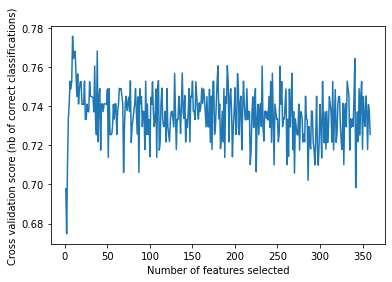

In [37]:
# =======================
# Female ( CN VS. MCI )
# Random Forest - RFECV
# =======================


forest_clf02 = RandomForestClassifier(random_state=43)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_forest01 = RFECV(estimator=forest_clf02, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_forest01.fit(x_train01, y_train01)
rfecv_forest01_x_train01 = rfecv_forest01.transform(x_train01)
rfecv_forest01_x_test01 = rfecv_forest01.transform(x_test01)


print("Optimal number of features : %d" % rfecv_forest01.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_forest01.grid_scores_) + min_features_to_select),
         rfecv_forest01.grid_scores_)
plt.show()

In [638]:
cols = rfecv_forest01.get_support(indices=True)
x_train_new02 = x_train01.iloc[:,cols]

x_train_new02.columns.values.tolist()      # Optimal feature's name

['lh.pericalcarine.thickness',
 'rh.paracentral.thickness',
 'rh.pericalcarine.thickness',
 'lh.postcentral.thicknessstd',
 'rh.bankssts.thicknessstd',
 'rh.inferiorparietal.thicknessstd',
 'rh.paracentral.thicknessstd',
 'rh.precentral.thicknessstd',
 'Left.Hippocampus']

---
- feature importances

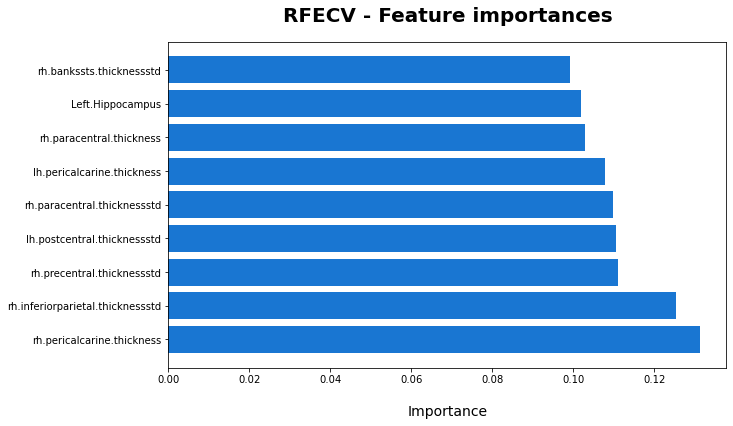

In [644]:
dset = pd.DataFrame()
dset['attr'] = x_train_new02.columns.values
dset['importance'] = rfecv_forest01.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

---
- __Only use the data after RFECV__

In [645]:
# =======================
# Training set (RFECV)
# Male ( CN VS. MCI )
# =======================


forest_clf03 = RandomForestClassifier(random_state=42)
start = time.process_time()
forest_clf03.fit(rfecv_forest01_x_train01, y_train01)

pred = cross_val_predict(forest_clf03, rfecv_forest01_x_train01, y_train01, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train01, pred))
print(classification_report(y_train01, pred))

Time:  0.15625
[[153  24]
 [ 35  46]]
              precision    recall  f1-score   support

         1.0       0.81      0.86      0.84       177
         2.0       0.66      0.57      0.61        81

    accuracy                           0.77       258
   macro avg       0.74      0.72      0.72       258
weighted avg       0.76      0.77      0.77       258



In [646]:
# =======================
# Testing set (RFECV)
# Male ( CN VS. MCI )
# =======================


start = time.process_time()

pred = cross_val_predict(forest_clf03, rfecv_forest01_x_test01, y_test01, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test01, pred))
print(classification_report(y_test01, pred))

Time:  0.046875
[[41  4]
 [ 5 15]]
              precision    recall  f1-score   support

         1.0       0.89      0.91      0.90        45
         2.0       0.79      0.75      0.77        20

    accuracy                           0.86        65
   macro avg       0.84      0.83      0.84        65
weighted avg       0.86      0.86      0.86        65



---
- __RFECV (RF) + Feature scaling + PCA__

In [65]:
# =======================
# Training set 
# Female(CN-MCI)
# =======================

forest_clf04 = RandomForestClassifier(random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_forest01_x_train01)

# Dimension reduction
#pca = PCA(n_components=8)
#x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

#print ("Components:",pca.n_components_)

forest_clf04.fit(x_train_scaled, y_train01)

pred = cross_val_predict(forest_clf04, x_train_scaled, y_train01, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(y_train01, pred))
print(classification_report(y_train01, pred))

Times:  1.40625
Confusion matrix: 
 [[153  24]
 [ 35  46]]
              precision    recall  f1-score   support

         1.0       0.81      0.86      0.84       177
         2.0       0.66      0.57      0.61        81

    accuracy                           0.77       258
   macro avg       0.74      0.72      0.72       258
weighted avg       0.76      0.77      0.77       258



In [66]:
# =======================
# test set
# =======================

start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_forest01_x_test01)

# Dimension reduction
#pca = PCA(n_components=8)
#x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print ("Components:",pca.n_components_)

pred = cross_val_predict(forest_clf04, x_train_scaled, y_test01, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(y_test01, pred))
print(classification_report(y_test01, pred))

Components: 8
Times:  1.109375
Confusion matrix: 
 [[41  4]
 [ 5 15]]
              precision    recall  f1-score   support

         1.0       0.89      0.91      0.90        45
         2.0       0.79      0.75      0.77        20

    accuracy                           0.86        65
   macro avg       0.84      0.83      0.84        65
weighted avg       0.86      0.86      0.86        65



<hr style="border:2px solid black"> </hr>

### 4.5 Binary Classifier (Female: CN vs. AD )

__CN:__ 1.0 (Cognitively Normal)  
__AD:__ 3.0 (Alzheimer's Disease)

__Data:__
- __female_CN_AD__


- __female_CN_AD_train__
- __female_CN_AD_train_labels__


- __female_CN_AD_test__
- __female_CN_AD_test_labels__

In [67]:
# Simplified name

x_train02 = female_CN_AD_train
y_train02 = female_CN_AD_train_labels
x_test02 = female_CN_AD_test
y_test02 = female_CN_AD_test_labels

<hr style="border:px solid black"> </hr>

### 4.2.1 SVM (Linear)
---
- __Baseline__

In [10]:
# ======================
# Training set
# Male ( CN VS. AD )
# ======================


svm_clf05 = SVC(kernel="linear", random_state=42)
start = time.process_time()
svm_clf05.fit(x_train02, y_train02)

pred = cross_val_predict(svm_clf05, x_train02, y_train02, cv=10, n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train02, pred))
print(classification_report(y_train02, pred))

Time:  0.453125
[[159  17]
 [ 12  41]]
              precision    recall  f1-score   support

         1.0       0.93      0.90      0.92       176
         3.0       0.71      0.77      0.74        53

    accuracy                           0.87       229
   macro avg       0.82      0.84      0.83       229
weighted avg       0.88      0.87      0.88       229



In [11]:
# ======================
# Testing set
# Male ( CN VS. AD )
# ======================


start = time.process_time()

pred = cross_val_predict(svm_clf05, x_test02, y_test02, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test02, pred))
print(classification_report(y_test02, pred))

Time:  0.125
[[41  5]
 [ 5  7]]
              precision    recall  f1-score   support

         1.0       0.89      0.89      0.89        46
         3.0       0.58      0.58      0.58        12

    accuracy                           0.83        58
   macro avg       0.74      0.74      0.74        58
weighted avg       0.83      0.83      0.83        58



---
- __Feature Selection - RFECV (SVM - Linear)__

Optimal number of features : 42
Time:  161.25


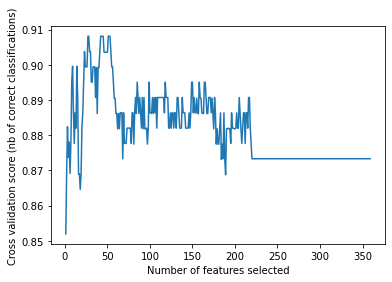

In [253]:
# ======================
# SVM (Linear) - RFECV
# Male ( CN VS. AD )
# ======================

svm_clf06 = SVC(kernel="linear", random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_svm02 = RFECV(estimator=svm_clf06, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_svm02.fit(x_train02, y_train02)
rfecv_svm02_x_train02 = rfecv_svm02.transform(x_train02)
rfecv_svm02_x_test02 = rfecv_svm02.transform(x_test02)


print("Optimal number of features : %d" % rfecv_svm02.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_svm02.grid_scores_) + min_features_to_select),
         rfecv_svm02.grid_scores_)
plt.show()

In [254]:
cols = rfecv_svm02.get_support(indices=True)
x_train_new = x_train02.iloc[:,cols]

x_train_new.columns.values.tolist()      # Optimal feature's name

['lh.bankssts.volume',
 'lh.caudalmiddlefrontal.volume',
 'lh.entorhinal.volume',
 'lh.inferiortemporal.volume',
 'lh.isthmuscingulate.volume',
 'lh.lingual.volume',
 'lh.middletemporal.volume',
 'lh.posteriorcingulate.volume',
 'lh.precuneus.volume',
 'lh.superiorfrontal.volume',
 'lh.frontalpole.volume',
 'lh.temporalpole.volume',
 'rh.entorhinal.volume',
 'rh.fusiform.volume',
 'rh.inferiortemporal.volume',
 'rh.lateralorbitofrontal.volume',
 'rh.lingual.volume',
 'rh.paracentral.volume',
 'rh.parsopercularis.volume',
 'rh.posteriorcingulate.volume',
 'rh.precentral.volume',
 'rh.superiortemporal.volume',
 'rh.temporalpole.volume',
 'lh.inferiorparietal.area',
 'lh.WhiteSurfArea.area',
 'rh.lateralorbitofrontal.area',
 'rh.postcentral.area',
 'rh.precentral.area',
 'rh.insula.area',
 'Left.Lateral.Ventricle',
 'Left.Hippocampus',
 'Right.Lateral.Ventricle',
 'Right.Caudate',
 'Right.Putamen',
 'Right.VentralDC',
 'SupraTentorialVol',
 'SupraTentorialVolNotVentVox',
 'Left.Hippocampu

---
- __Only use the data after RFECV__

In [255]:
# ======================
# Training set ( After RFECV)
# Male ( CN VS. AD )
# ======================

svm_clf07 = SVC(kernel="linear", random_state=42)
start = time.process_time()
svm_clf07.fit(rfecv_svm02_x_train02, y_train02)

pred = cross_val_predict(svm_clf07, rfecv_svm02_x_train02, y_train02, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train02, pred))
print(classification_report(y_train02, pred))

Time:  0.1875
[[174   2]
 [  4  49]]
              precision    recall  f1-score   support

         1.0       0.98      0.99      0.98       176
         3.0       0.96      0.92      0.94        53

    accuracy                           0.97       229
   macro avg       0.97      0.96      0.96       229
weighted avg       0.97      0.97      0.97       229



In [256]:
# ======================
# Testing set (After RFECV)
# Male ( CN VS. AD )
# ======================

start = time.process_time()

pred = cross_val_predict(svm_clf07, rfecv_svm02_x_test02, y_test02, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test02, pred))
print(classification_report(y_test02, pred))

Time:  0.0625
[[43  3]
 [ 1 11]]
              precision    recall  f1-score   support

         1.0       0.98      0.93      0.96        46
         3.0       0.79      0.92      0.85        12

    accuracy                           0.93        58
   macro avg       0.88      0.93      0.90        58
weighted avg       0.94      0.93      0.93        58



---
- __RFECV (SVM) + Feature scaling + PCA__

In [340]:
# ======================
# Training set
# Male ( CN VS. AD )
# ======================


svm_clf08 = SVC(kernel="linear", random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_svm02_x_train02)

# Dimension reduction
pca = PCA(n_components=0.981)  # n_components
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print ("Components:",pca.n_components_)

svm_clf08.fit(x_train_scaled_reduced, y_train02)


pred = cross_val_predict(svm_clf08, x_train_scaled_reduced, y_train02, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train02, pred))
print(classification_report(y_train02, pred))

[0.37709929 0.10605294 0.06452437 0.04436173 0.03433002 0.03292291
 0.02770159 0.02418856 0.02279887 0.02028228 0.01946874 0.01725359
 0.01576148 0.01455905 0.01366524 0.0136039  0.01305493 0.01274524
 0.01172364 0.01088931 0.01025095 0.00895232 0.00852827 0.00842978
 0.00753439 0.0068486  0.00635303 0.00625085 0.00563289 0.0049698
 0.00463574 0.00409325 0.00371585]
[15.90763563  4.47375968  2.7219098   1.87136452  1.44818499  1.38882678
  1.16856971  1.02037547  0.96175247  0.85559183  0.8212736   0.72782904
  0.66488553  0.61416183  0.57645728  0.57386995  0.55071171  0.53764806
  0.49455268  0.45935676  0.43242809  0.37764653  0.35975834  0.35560348
  0.31783235  0.28890277  0.26799744  0.26368721  0.23761892  0.20964708
  0.19555522  0.17267052  0.15675029]
Components: 33
Time:  0.1875
[[167   9]
 [  4  49]]
              precision    recall  f1-score   support

         1.0       0.98      0.95      0.96       176
         3.0       0.84      0.92      0.88        53

    accuracy

Text(0, 0.5, 'cumulative explained variance')

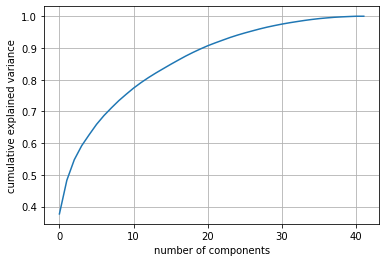

In [260]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [341]:
# =======================
# Testing set
# Male ( CN VS. AD )
# =======================


start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(rfecv_svm02_x_test02)

# Dimension reduction
pca = PCA(n_components=0.981)
x_test_scaled_reduced = pca.fit_transform(x_test_scaled)

print ("Components:",pca.n_components_)

# confusion matrix
pred = cross_val_predict(svm_clf08, x_test_scaled_reduced, y_test02, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test02, pred))
print(classification_report(y_test02, pred))

Components: 28
Time:  0.09375
[[45  1]
 [ 2 10]]
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97        46
         3.0       0.91      0.83      0.87        12

    accuracy                           0.95        58
   macro avg       0.93      0.91      0.92        58
weighted avg       0.95      0.95      0.95        58



<hr style="border:px solid black"> </hr>

## 4.2.2 Logistic Regression
- __Baseline__

In [12]:
# =======================
# Training set
# Male ( CN VS. AD )
# =======================


log_reg05 = LogisticRegression(max_iter=60000, penalty='l2', random_state=42)
start = time.process_time()
log_reg05.fit(x_train02, y_train02)

pred = cross_val_predict(log_reg05, x_train02, y_train02, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train02, pred))
print(classification_report(y_train02, pred))

Time:  28.671875
[[162  14]
 [ 13  40]]
              precision    recall  f1-score   support

         1.0       0.93      0.92      0.92       176
         3.0       0.74      0.75      0.75        53

    accuracy                           0.88       229
   macro avg       0.83      0.84      0.84       229
weighted avg       0.88      0.88      0.88       229



In [13]:
# =======================
# Testing set
# Male ( CN VS. AD )
# =======================


start = time.process_time()

pred = cross_val_predict(log_reg05, x_test02, y_test02, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test02, pred))
print(classification_report(y_test02, pred))

Time:  4.34375
[[42  4]
 [ 3  9]]
              precision    recall  f1-score   support

         1.0       0.93      0.91      0.92        46
         3.0       0.69      0.75      0.72        12

    accuracy                           0.88        58
   macro avg       0.81      0.83      0.82        58
weighted avg       0.88      0.88      0.88        58



---
- __Feature Selection - RFECV (Logistic Regression)__

Optimal number of features : 25
Time:  656.5


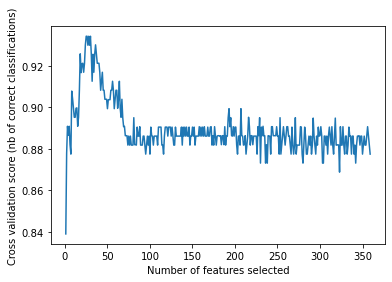

In [342]:
# ==============================
# Male ( CN VS. AD )
# Logistic Regression - RFECV
# ==============================


log_reg06 = LogisticRegression(max_iter=100000000, penalty='l2', random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_lr02 = RFECV(estimator=log_reg06, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_lr02.fit(x_train02, y_train02)
rfecv_lr02_x_train02 = rfecv_lr02.transform(x_train02)
rfecv_lr02_x_test02 = rfecv_lr02.transform(x_test02)


print("Optimal number of features : %d" % rfecv_lr02.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_lr02.grid_scores_) + min_features_to_select),
         rfecv_lr02.grid_scores_)
plt.show()

In [343]:
cols = rfecv_lr02.get_support(indices=True)
x_train_new = x_train02.iloc[:,cols]

x_train_new.columns.values.tolist()      # Optimal feature's name

['lh.bankssts.volume',
 'lh.lingual.volume',
 'lh.medialorbitofrontal.volume',
 'lh.middletemporal.volume',
 'lh.posteriorcingulate.volume',
 'lh.precuneus.volume',
 'lh.superiorfrontal.volume',
 'rh.entorhinal.volume',
 'rh.fusiform.volume',
 'rh.inferiortemporal.volume',
 'rh.lingual.volume',
 'rh.medialorbitofrontal.volume',
 'rh.paracentral.volume',
 'rh.parsopercularis.volume',
 'rh.pericalcarine.volume',
 'rh.posteriorcingulate.volume',
 'rh.precentral.volume',
 'rh.fusiform.area',
 'Left.Hippocampus',
 'Left.VentralDC',
 'Right.Inf.Lat.Vent',
 'Right.Caudate',
 'Right.Putamen',
 'Left.Hippocampus.HS',
 'left.CA1']

---
- __Only use the data after RFECV__

In [353]:
# =======================
# Training set (RFECV)
# Male ( CN VS. AD )
# =======================


log_reg07 = LogisticRegression(max_iter=60000, penalty='l2', random_state=42)
start = time.process_time()
log_reg07.fit(rfecv_lr02_x_train02, y_train02)

pred = cross_val_predict(log_reg07, rfecv_lr02_x_train02, y_train02, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train02, pred))
print(classification_report(y_train02, pred))

Time:  0.109375
[[173   3]
 [  3  50]]
              precision    recall  f1-score   support

         1.0       0.98      0.98      0.98       176
         3.0       0.94      0.94      0.94        53

    accuracy                           0.97       229
   macro avg       0.96      0.96      0.96       229
weighted avg       0.97      0.97      0.97       229



In [354]:
# =======================
# rfecv - test set
# =======================


start = time.process_time()

pred = cross_val_predict(log_reg07, rfecv_lr02_x_test02, y_test02, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test02, pred))
print(classification_report(y_test02, pred))

Time:  0.03125
[[40  6]
 [ 3  9]]
              precision    recall  f1-score   support

         1.0       0.93      0.87      0.90        46
         3.0       0.60      0.75      0.67        12

    accuracy                           0.84        58
   macro avg       0.77      0.81      0.78        58
weighted avg       0.86      0.84      0.85        58



---
- __RFECV (Logistic Regression) + Feature scaling + PCA__

In [393]:
# =======================
##### train set
# =======================


log_reg08 = LogisticRegression(max_iter=60000, penalty='l2', random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_lr02_x_train02)

# Dimension reduction
pca = PCA(n_components=0.96)
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print ("Components:",pca.n_components_)

log_reg08.fit(x_train_scaled_reduced, y_train02)

pred = cross_val_predict(log_reg08, x_train_scaled_reduced, y_train02, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(y_train02, pred))
print(classification_report(y_train02, pred))

Components: 20
Times:  0.375
Confusion matrix: 
 [[172   4]
 [  7  46]]
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       176
         3.0       0.92      0.87      0.89        53

    accuracy                           0.95       229
   macro avg       0.94      0.92      0.93       229
weighted avg       0.95      0.95      0.95       229



Text(0, 0.5, 'cumulative explained variance')

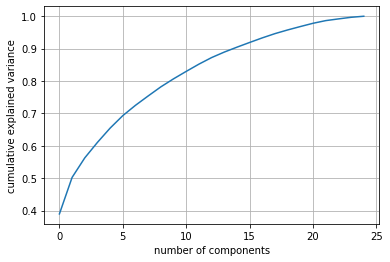

In [356]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [392]:
# =======================
# test set
# =======================


start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_lr02_x_test02)

# Dimension reduction
pca = PCA(n_components=0.96)
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print ("Components:",pca.n_components_)

pred = cross_val_predict(log_reg08, x_train_scaled_reduced, y_test02, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(y_test02, pred))
print(classification_report(y_test02, pred))

Components: 18
Times:  0.046875
Confusion matrix: 
 [[45  1]
 [ 3  9]]
              precision    recall  f1-score   support

         1.0       0.94      0.98      0.96        46
         3.0       0.90      0.75      0.82        12

    accuracy                           0.93        58
   macro avg       0.92      0.86      0.89        58
weighted avg       0.93      0.93      0.93        58



<hr style="border:px solid black"> </hr>

## 4.2.3 Decision Tree
- __Baseline__

In [14]:
# =======================
# Training set
# Male ( CN VS. AD )
# =======================


tree_clf05 = DecisionTreeClassifier(random_state=42)
start = time.process_time()
tree_clf05.fit(x_train02, y_train02)

pred = cross_val_predict(tree_clf05, x_train02, y_train02, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train02, pred))
print(classification_report(y_train02, pred))

Time:  0.40625
[[156  20]
 [ 20  33]]
              precision    recall  f1-score   support

         1.0       0.89      0.89      0.89       176
         3.0       0.62      0.62      0.62        53

    accuracy                           0.83       229
   macro avg       0.75      0.75      0.75       229
weighted avg       0.83      0.83      0.83       229



In [15]:
# =======================
# Testing set
# Male ( CN VS. AD )
# =======================


start = time.process_time()

pred = cross_val_predict(tree_clf05, x_test02, y_test02, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test02, pred))
print(classification_report(y_test02, pred))

Time:  0.109375
[[40  6]
 [ 5  7]]
              precision    recall  f1-score   support

         1.0       0.89      0.87      0.88        46
         3.0       0.54      0.58      0.56        12

    accuracy                           0.81        58
   macro avg       0.71      0.73      0.72        58
weighted avg       0.82      0.81      0.81        58



---
- __Feature Selection - RFECV (Decision Tree)__

Optimal number of features : 281
Time:  2.53125


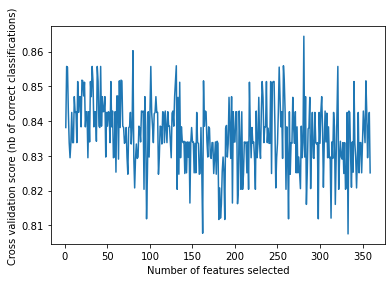

In [68]:
# =======================
# Male ( CN VS. AD )
# Decision Tree - RFECV
# =======================


tree_clf06 = DecisionTreeClassifier(random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_tree02 = RFECV(estimator=tree_clf06, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_tree02.fit(x_train02, y_train02)
rfecv_tree02_x_train02 = rfecv_tree02.transform(x_train02)
rfecv_tree02_x_test02 = rfecv_tree02.transform(x_test02)


print("Optimal number of features : %d" % rfecv_tree02.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_tree02.grid_scores_) + min_features_to_select),
         rfecv_tree02.grid_scores_)
plt.show()

In [204]:
cols = rfecv_tree02.get_support(indices=True)
x_train_new03 = x_train02.iloc[:,cols]

x_train_new03.columns.values.tolist()      # Optimal feature's name

['lh.inferiortemporal.thickness',
 'lh.isthmuscingulate.thickness',
 'lh.lateraloccipital.thickness',
 'lh.lateralorbitofrontal.thickness',
 'lh.lingual.thickness',
 'lh.medialorbitofrontal.thickness',
 'lh.middletemporal.thickness',
 'lh.parahippocampal.thickness',
 'lh.paracentral.thickness',
 'lh.parsopercularis.thickness',
 'lh.parsorbitalis.thickness',
 'lh.parstriangularis.thickness',
 'lh.pericalcarine.thickness',
 'lh.postcentral.thickness',
 'lh.posteriorcingulate.thickness',
 'lh.precentral.thickness',
 'lh.precuneus.thickness',
 'lh.rostralanteriorcingulate.thickness',
 'lh.rostralmiddlefrontal.thickness',
 'lh.superiorfrontal.thickness',
 'lh.superiorparietal.thickness',
 'lh.superiortemporal.thickness',
 'lh.supramarginal.thickness',
 'lh.frontalpole.thickness',
 'lh.temporalpole.thickness',
 'lh.transversetemporal.thickness',
 'lh.insula.thickness',
 'lh.MeanThickness.thickness',
 'rh.bankssts.thickness',
 'rh.caudalanteriorcingulate.thickness',
 'rh.caudalmiddlefrontal.t

- feature importances

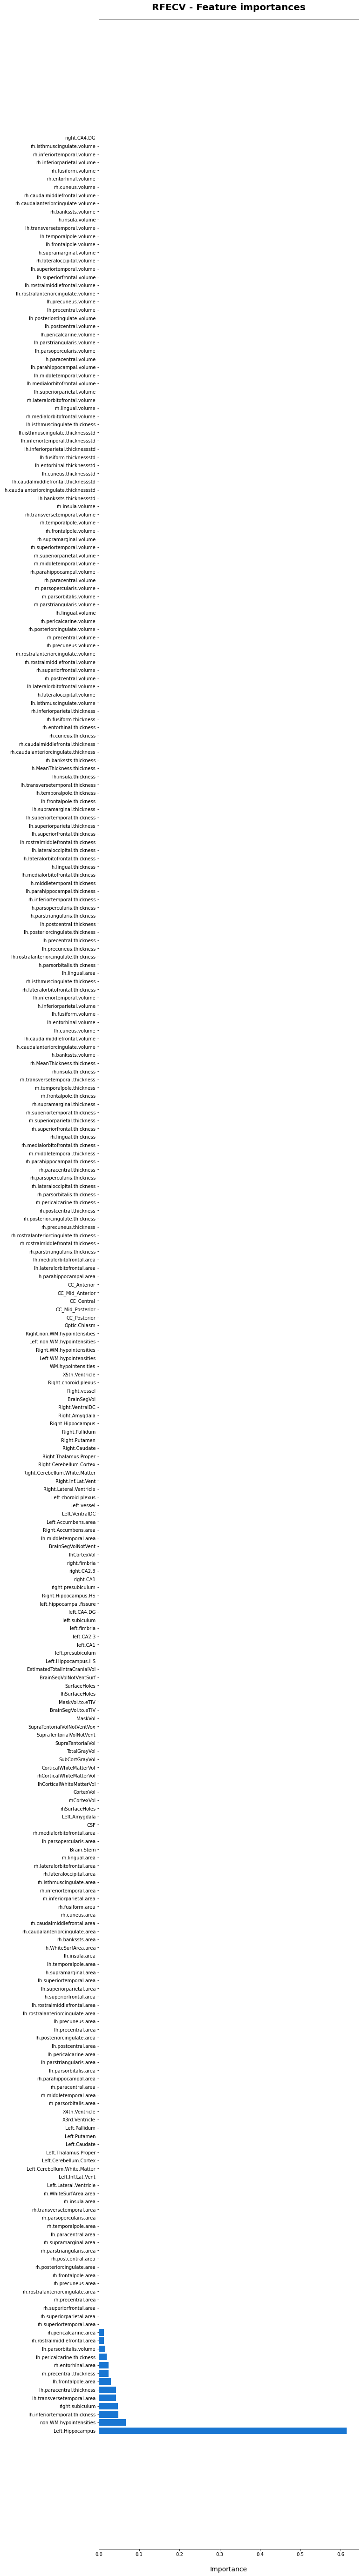

In [205]:
dset = pd.DataFrame()
dset['attr'] = x_train_new03.columns.values
dset['importance'] = rfecv_tree02.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 100))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

---
- __Only use the data after RFECV__

In [207]:
# =========================
# Training set (RFECV)
# Male ( CN VS. AD )
# =========================


tree_clf07 = DecisionTreeClassifier(random_state=55)
start = time.process_time()
tree_clf07.fit(rfecv_tree02_x_train02, y_train02)

pred = cross_val_predict(tree_clf07, rfecv_tree02_x_train02, y_train02, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train02, pred))
print(classification_report(y_train02, pred))

Time:  0.03125
[[160  16]
 [ 20  33]]
              precision    recall  f1-score   support

         1.0       0.89      0.91      0.90       176
         3.0       0.67      0.62      0.65        53

    accuracy                           0.84       229
   macro avg       0.78      0.77      0.77       229
weighted avg       0.84      0.84      0.84       229



In [208]:
# =========================
# Testing set (RFECV)
# Male ( CN VS. AD )
# =========================


start = time.process_time()

pred = cross_val_predict(tree_clf07, rfecv_tree02_x_test02, y_test02, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test02, pred))
print(classification_report(y_test02, pred))

Time:  0.0
[[40  6]
 [ 4  8]]
              precision    recall  f1-score   support

         1.0       0.91      0.87      0.89        46
         3.0       0.57      0.67      0.62        12

    accuracy                           0.83        58
   macro avg       0.74      0.77      0.75        58
weighted avg       0.84      0.83      0.83        58



---
- __RFECV (DT) + Feature scaling + PCA__

In [73]:
# ======================
# Training set
# Female ( CN VS. AD )
# ======================

tree_clf08 = DecisionTreeClassifier(random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_tree02_x_train02)

# Dimension reduction
pca = PCA(n_components=0.95)  # n_components
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

#print (pca.explained_variance_ratio_)
#print (pca.explained_variance_)
print ("Components:",pca.n_components_)

tree_clf08.fit(x_train_scaled_reduced, y_train02)


pred = cross_val_predict(tree_clf08, x_train_scaled_reduced, y_train02, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train02, pred))
print(classification_report(y_train02, pred))

Components: 88
Time:  0.9375
[[154  22]
 [ 20  33]]
              precision    recall  f1-score   support

         1.0       0.89      0.88      0.88       176
         3.0       0.60      0.62      0.61        53

    accuracy                           0.82       229
   macro avg       0.74      0.75      0.75       229
weighted avg       0.82      0.82      0.82       229



In [74]:
# =======================
# Testing set
# Female ( CN VS. AD )
# =======================


start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(rfecv_tree02_x_test02)

# Dimension reduction
pca = PCA(n_components=0.95)
x_test_scaled_reduced = pca.fit_transform(x_test_scaled)

print ("Components:",pca.n_components_)

# confusion matrix
pred = cross_val_predict(tree_clf08, x_test_scaled_reduced, y_test02, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test02, pred))
print(classification_report(y_test02, pred))

Components: 41
Time:  1.140625
[[43  3]
 [ 5  7]]
              precision    recall  f1-score   support

         1.0       0.90      0.93      0.91        46
         3.0       0.70      0.58      0.64        12

    accuracy                           0.86        58
   macro avg       0.80      0.76      0.78        58
weighted avg       0.86      0.86      0.86        58



<hr style="border:px solid black"> </hr>

## 4.2.4 Random Forest
- __Baseline__

In [16]:
# =======================
# Training set
# Male ( CN VS. AD )
# =======================


start = time.process_time()
forest_clf05 = RandomForestClassifier(random_state=42)
forest_clf05.fit(x_train02, y_train02)

pred = cross_val_predict(forest_clf05, x_train02, y_train02, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train02, pred))
print(classification_report(y_train02, pred))

Time:  2.125
[[170   6]
 [ 17  36]]
              precision    recall  f1-score   support

         1.0       0.91      0.97      0.94       176
         3.0       0.86      0.68      0.76        53

    accuracy                           0.90       229
   macro avg       0.88      0.82      0.85       229
weighted avg       0.90      0.90      0.90       229



In [17]:
# =======================
# Testing set
# Male ( CN VS. AD )
# =======================

start = time.process_time()

pred = cross_val_predict(forest_clf05, x_test02, y_test02, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test02, pred))
print(classification_report(y_test02, pred))

Time:  1.3125
[[44  2]
 [ 6  6]]
              precision    recall  f1-score   support

         1.0       0.88      0.96      0.92        46
         3.0       0.75      0.50      0.60        12

    accuracy                           0.86        58
   macro avg       0.81      0.73      0.76        58
weighted avg       0.85      0.86      0.85        58



---
- __Feature Selection - RFECV (Random Forest)__

Optimal number of features : 352
Time:  1.734375


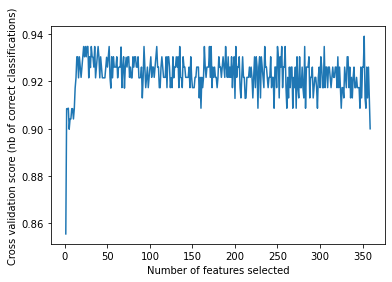

In [76]:
# =======================
# Male ( CN VS. AD )
# Random Forest - RFECV
# =======================


forest_clf06 = RandomForestClassifier(random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_forest02 = RFECV(estimator=forest_clf06, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_forest02.fit(x_train02, y_train02)
rfecv_forest02_x_train02 = rfecv_forest02.transform(x_train02)
rfecv_forest02_x_test02 = rfecv_forest02.transform(x_test02)


print("Optimal number of features : %d" % rfecv_forest02.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_forest02.grid_scores_) + min_features_to_select),
         rfecv_forest02.grid_scores_)
plt.show()

In [715]:
cols = rfecv_forest02.get_support(indices=True)
x_train_new04 = x_train02.iloc[:,cols]

x_train_new04.columns.values.tolist()      # Optimal feature's name

['lh.bankssts.thickness',
 'lh.caudalanteriorcingulate.thickness',
 'lh.caudalmiddlefrontal.thickness',
 'lh.cuneus.thickness',
 'lh.entorhinal.thickness',
 'lh.fusiform.thickness',
 'lh.inferiorparietal.thickness',
 'lh.inferiortemporal.thickness',
 'lh.isthmuscingulate.thickness',
 'lh.lateraloccipital.thickness',
 'lh.lateralorbitofrontal.thickness',
 'lh.lingual.thickness',
 'lh.medialorbitofrontal.thickness',
 'lh.middletemporal.thickness',
 'lh.parahippocampal.thickness',
 'lh.paracentral.thickness',
 'lh.parsopercularis.thickness',
 'lh.parsorbitalis.thickness',
 'lh.parstriangularis.thickness',
 'lh.pericalcarine.thickness',
 'lh.postcentral.thickness',
 'lh.posteriorcingulate.thickness',
 'lh.precentral.thickness',
 'lh.precuneus.thickness',
 'lh.rostralanteriorcingulate.thickness',
 'lh.rostralmiddlefrontal.thickness',
 'lh.superiorfrontal.thickness',
 'lh.superiorparietal.thickness',
 'lh.superiortemporal.thickness',
 'lh.supramarginal.thickness',
 'lh.frontalpole.thickness'

- feature importances

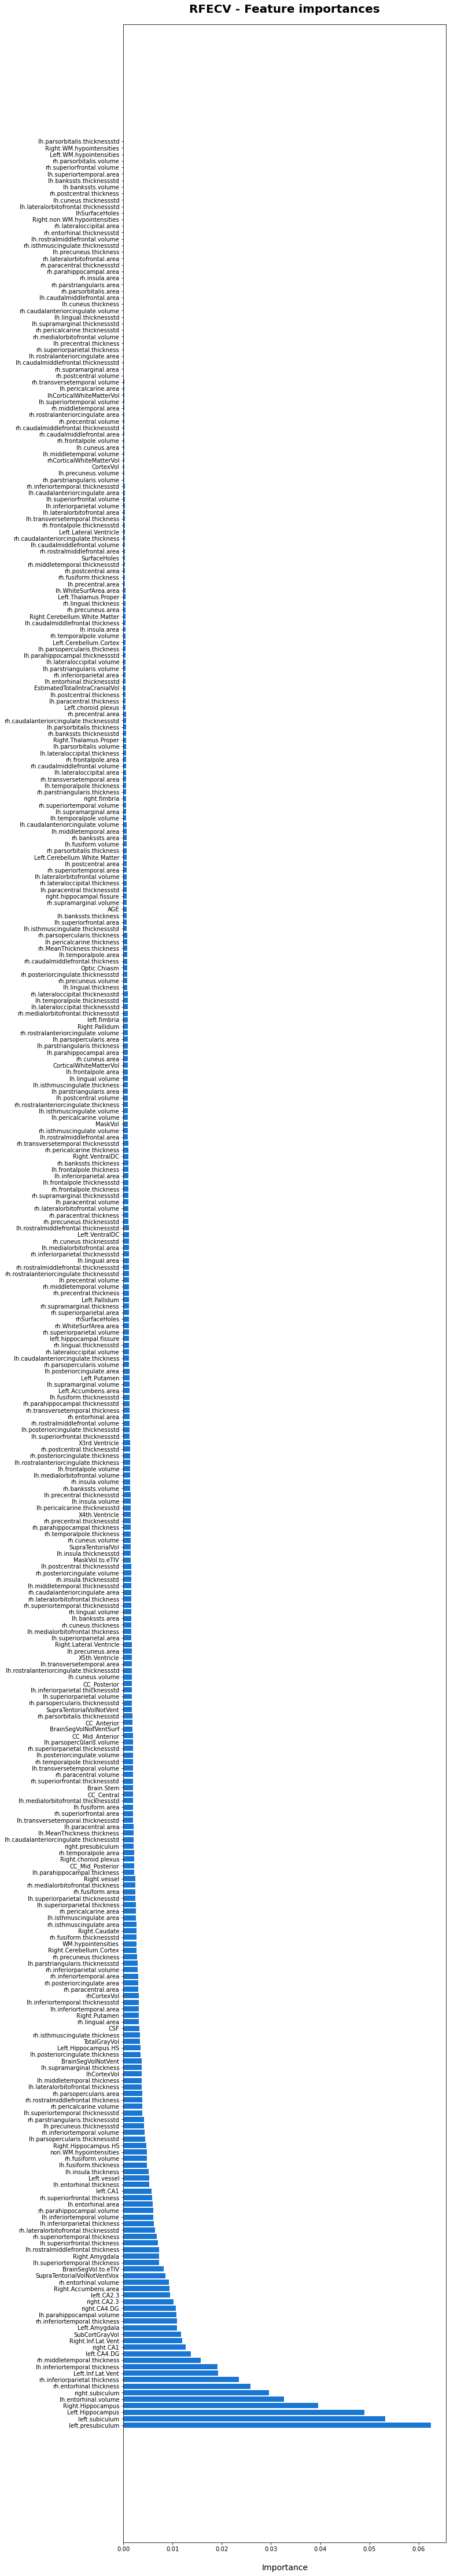

In [716]:
dset = pd.DataFrame()
dset['attr'] = x_train_new04.columns.values
dset['importance'] = rfecv_forest02.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 80))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

---
- __Only use the data after RFECV__

In [717]:
# =======================
# Training set (RFECV)
# Male ( CN VS. AD )
# =======================


forest_clf07 = RandomForestClassifier(random_state=41)
start = time.process_time()
forest_clf07.fit(rfecv_forest02_x_train02, y_train02)

pred = cross_val_predict(forest_clf07, rfecv_forest02_x_train02, y_train02, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train02, pred))
print(classification_report(y_train02, pred))

Time:  0.25
[[172   4]
 [ 14  39]]
              precision    recall  f1-score   support

         1.0       0.92      0.98      0.95       176
         3.0       0.91      0.74      0.81        53

    accuracy                           0.92       229
   macro avg       0.92      0.86      0.88       229
weighted avg       0.92      0.92      0.92       229



In [718]:
# =======================
# Testing set (RFECV)
# Male ( CN VS. MCI )
# =======================


start = time.process_time()

pred = cross_val_predict(forest_clf07, rfecv_forest02_x_test02, y_test02, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test02, pred))
print(classification_report(y_test02, pred))

Time:  0.015625
[[44  2]
 [ 5  7]]
              precision    recall  f1-score   support

         1.0       0.90      0.96      0.93        46
         3.0       0.78      0.58      0.67        12

    accuracy                           0.88        58
   macro avg       0.84      0.77      0.80        58
weighted avg       0.87      0.88      0.87        58



---
- __RFECV (RF) + Feature scaling + PCA__

In [81]:
# =======================
# Training set 
# Female(CN-AD)
# =======================

forest_clf08 = RandomForestClassifier(random_state=41)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_forest02_x_train02)

# Dimension reduction
#pca = PCA(n_components=0.9)
#x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print ("Components:",pca.n_components_)

forest_clf08.fit(x_train_scaled, y_train02)

pred = cross_val_predict(forest_clf08, x_train_scaled, y_train02, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(y_train02, pred))
print(classification_report(y_train02, pred))

Components: 35
Times:  2.0
Confusion matrix: 
 [[172   4]
 [ 14  39]]
              precision    recall  f1-score   support

         1.0       0.92      0.98      0.95       176
         3.0       0.91      0.74      0.81        53

    accuracy                           0.92       229
   macro avg       0.92      0.86      0.88       229
weighted avg       0.92      0.92      0.92       229



In [82]:
# =======================
# test set
# =======================

start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_forest02_x_test02)

# Dimension reduction
#pca = PCA(n_components=0.9)
#x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print ("Components:",pca.n_components_)

pred = cross_val_predict(forest_clf08, x_train_scaled, y_test02, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(y_test02, pred))
print(classification_report(y_test02, pred))

Components: 35
Times:  1.21875
Confusion matrix: 
 [[44  2]
 [ 5  7]]
              precision    recall  f1-score   support

         1.0       0.90      0.96      0.93        46
         3.0       0.78      0.58      0.67        12

    accuracy                           0.88        58
   macro avg       0.84      0.77      0.80        58
weighted avg       0.87      0.88      0.87        58



<hr style="border:2px solid black"> </hr>

### 4.6 Binary Classifier (Female: MCI vs. AD )

__MCI:__ 2.0 (Mild Cognitive Impairment)  
__AD:__ 3.0 (Alzheimer's Disease)

__Data:__
- __female_MCI_AD__


- __female_MCI_AD_train__
- __female_MCI_AD_train_labels__


- __female_MCI_AD_test__
- __female_MCI_AD_test_labels__

In [83]:
# Simplified name

x_train03 = female_MCI_AD_train
y_train03 = female_MCI_AD_train_labels
x_test03 = female_MCI_AD_test
y_test03 = female_MCI_AD_test_labels

<hr style="border:px solid black"> </hr>

### 4.3.1 SVM (Linear)
---
- __Baseline__

In [469]:
# ======================
# Training set
# Male ( MCI VS. AD )
# ======================


svm_clf09 = SVC(kernel="linear", random_state=42)
start = time.process_time()
svm_clf09.fit(x_train03, y_train03)

pred = cross_val_predict(svm_clf09, x_train03, y_train03, cv=10, n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train03, pred))
print(classification_report(y_train03, pred))

Time:  1.09375
[[61 19]
 [15 37]]
              precision    recall  f1-score   support

         2.0       0.80      0.76      0.78        80
         3.0       0.66      0.71      0.69        52

    accuracy                           0.74       132
   macro avg       0.73      0.74      0.73       132
weighted avg       0.75      0.74      0.74       132



In [470]:
# ======================
# Testing set
# Male ( MCI VS. AD )
# ======================


start = time.process_time()

pred = cross_val_predict(svm_clf09, x_test03, y_test03, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test03, pred))
print(classification_report(y_test03, pred))

Time:  0.203125
[[16  5]
 [ 6  7]]
              precision    recall  f1-score   support

         2.0       0.73      0.76      0.74        21
         3.0       0.58      0.54      0.56        13

    accuracy                           0.68        34
   macro avg       0.66      0.65      0.65        34
weighted avg       0.67      0.68      0.67        34



---
- __Feature Selection - RFECV (SVM - Linear)__

Optimal number of features : 72
Time:  366.28125


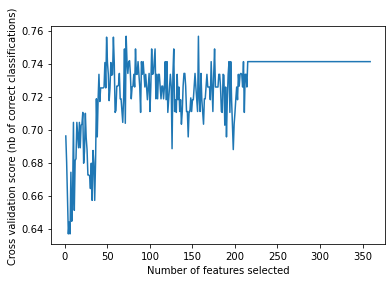

In [517]:
# ======================
# SVM (Linear) - RFECV
# Male ( MCI VS. AD )
# ======================

svm_clf10 = SVC(kernel="linear", random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_svm03 = RFECV(estimator=svm_clf10, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_svm03.fit(x_train03, y_train03)
rfecv_svm03_x_train03 = rfecv_svm03.transform(x_train03)
rfecv_svm03_x_test03 = rfecv_svm03.transform(x_test03)


print("Optimal number of features : %d" % rfecv_svm03.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_svm03.grid_scores_) + min_features_to_select),
         rfecv_svm03.grid_scores_)
plt.show()

In [518]:
cols = rfecv_svm03.get_support(indices=True)
x_train_new = x_train03.iloc[:,cols]

x_train_new.columns.values.tolist()      # Optimal feature's name

['lh.caudalanteriorcingulate.volume',
 'lh.entorhinal.volume',
 'lh.lateralorbitofrontal.volume',
 'lh.lingual.volume',
 'lh.medialorbitofrontal.volume',
 'lh.parsorbitalis.volume',
 'lh.pericalcarine.volume',
 'lh.posteriorcingulate.volume',
 'lh.rostralanteriorcingulate.volume',
 'lh.insula.volume',
 'rh.caudalanteriorcingulate.volume',
 'rh.caudalmiddlefrontal.volume',
 'rh.fusiform.volume',
 'rh.inferiorparietal.volume',
 'rh.inferiortemporal.volume',
 'rh.isthmuscingulate.volume',
 'rh.lateralorbitofrontal.volume',
 'rh.lingual.volume',
 'rh.medialorbitofrontal.volume',
 'rh.middletemporal.volume',
 'rh.paracentral.volume',
 'rh.parsopercularis.volume',
 'rh.parstriangularis.volume',
 'rh.pericalcarine.volume',
 'rh.posteriorcingulate.volume',
 'rh.precentral.volume',
 'rh.rostralanteriorcingulate.volume',
 'rh.superiorparietal.volume',
 'rh.temporalpole.volume',
 'rh.insula.volume',
 'lh.caudalanteriorcingulate.area',
 'lh.lateralorbitofrontal.area',
 'lh.pericalcarine.area',
 'l

---
- __Only use the data after RFECV__

In [519]:
# ======================
# Training set ( After RFECV)
# Male ( MCI VS. AD )
# ======================

svm_clf11 = SVC(kernel="linear", random_state=42)
start = time.process_time()
svm_clf11.fit(rfecv_svm03_x_train03, y_train03)

pred = cross_val_predict(svm_clf11, rfecv_svm03_x_train03, y_train03, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train03, pred))
print(classification_report(y_train03, pred))

Time:  0.671875
[[72  8]
 [10 42]]
              precision    recall  f1-score   support

         2.0       0.88      0.90      0.89        80
         3.0       0.84      0.81      0.82        52

    accuracy                           0.86       132
   macro avg       0.86      0.85      0.86       132
weighted avg       0.86      0.86      0.86       132



In [520]:
# ======================
# Testing set (After RFECV)
# Male ( MCI VS. AD )
# ======================

start = time.process_time()

pred = cross_val_predict(svm_clf11, rfecv_svm03_x_test03, y_test03, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test03, pred))
print(classification_report(y_test03, pred))

Time:  0.0
[[13  8]
 [ 4  9]]
              precision    recall  f1-score   support

         2.0       0.76      0.62      0.68        21
         3.0       0.53      0.69      0.60        13

    accuracy                           0.65        34
   macro avg       0.65      0.66      0.64        34
weighted avg       0.67      0.65      0.65        34



---
- __RFECV (SVM) + Feature scaling + PCA__

In [562]:
# ======================
# Training set
# Male ( MCI VS. AD )
# ======================


svm_clf12 = SVC(kernel="linear", random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_svm03_x_train03)

# Dimension reduction
pca = PCA(n_components=0.55)  # n_components
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print ("Components:",pca.n_components_)

svm_clf12.fit(x_train_scaled_reduced, y_train03)


pred = cross_val_predict(svm_clf12, x_train_scaled_reduced, y_train03, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train03, pred))
print(classification_report(y_train03, pred))

[0.43111041 0.0654225  0.04558408 0.04092719]
[31.27689572  4.74637731  3.30710774  2.96925236]
Components: 4
Time:  0.1875
[[66 14]
 [14 38]]
              precision    recall  f1-score   support

         2.0       0.82      0.82      0.82        80
         3.0       0.73      0.73      0.73        52

    accuracy                           0.79       132
   macro avg       0.78      0.78      0.78       132
weighted avg       0.79      0.79      0.79       132



Text(0, 0.5, 'cumulative explained variance')

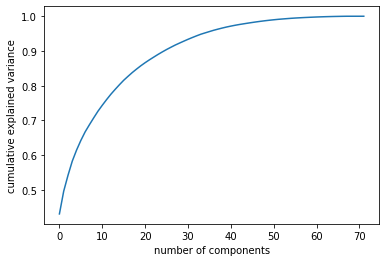

In [522]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [563]:
# =======================
# Testing set
# Male ( MCI VS. AD )
# =======================


start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(rfecv_svm03_x_test03)

# Dimension reduction
pca = PCA(n_components=0.55)
x_test_scaled_reduced = pca.fit_transform(x_test_scaled)

print ("Components:",pca.n_components_)

# confusion matrix
pred = cross_val_predict(svm_clf12, x_test_scaled_reduced, y_test03, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test03, pred))
print(classification_report(y_test03, pred))

Components: 4
Time:  0.203125
[[17  4]
 [ 2 11]]
              precision    recall  f1-score   support

         2.0       0.89      0.81      0.85        21
         3.0       0.73      0.85      0.79        13

    accuracy                           0.82        34
   macro avg       0.81      0.83      0.82        34
weighted avg       0.83      0.82      0.83        34



<hr style="border:px solid black"> </hr>

## 4.3.2 Logistic Regression
- __Baseline__

In [471]:
# =======================
# Training set
# Male ( MCI VS. AD )
# =======================


log_reg09 = LogisticRegression(max_iter=60000, penalty='l2', random_state=42)
start = time.process_time()
log_reg09.fit(x_train03, y_train03)

pred = cross_val_predict(log_reg09, x_train03, y_train03, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train03, pred))
print(classification_report(y_train03, pred))

Time:  43.9375
[[67 13]
 [20 32]]
              precision    recall  f1-score   support

         2.0       0.77      0.84      0.80        80
         3.0       0.71      0.62      0.66        52

    accuracy                           0.75       132
   macro avg       0.74      0.73      0.73       132
weighted avg       0.75      0.75      0.75       132



In [472]:
# =======================
# Testing set
# Male ( MCI VS. AD )
# =======================


start = time.process_time()

pred = cross_val_predict(log_reg09, x_test03, y_test03, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test03, pred))
print(classification_report(y_test03, pred))

Time:  1.515625
[[14  7]
 [ 8  5]]
              precision    recall  f1-score   support

         2.0       0.64      0.67      0.65        21
         3.0       0.42      0.38      0.40        13

    accuracy                           0.56        34
   macro avg       0.53      0.53      0.53        34
weighted avg       0.55      0.56      0.56        34



---
- __Feature Selection - RFECV (Logistic Regression)__

Optimal number of features : 320
Time:  159.703125


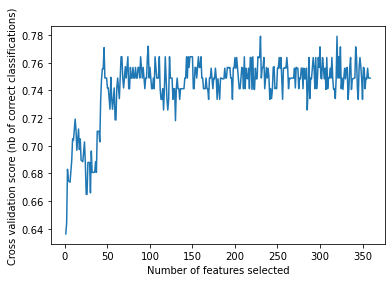

In [564]:
# ==============================
# Male ( MCI VS. AD )
# Logistic Regression - RFECV
# ==============================


log_reg10 = LogisticRegression(max_iter=100000000, penalty='l2', random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_lr03 = RFECV(estimator=log_reg10, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_lr03.fit(x_train03, y_train03)
rfecv_lr03_x_train03 = rfecv_lr03.transform(x_train03)
rfecv_lr03_x_test03 = rfecv_lr03.transform(x_test03)


print("Optimal number of features : %d" % rfecv_lr03.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_lr03.grid_scores_) + min_features_to_select),
         rfecv_lr03.grid_scores_)
plt.show()

In [565]:
cols = rfecv_lr03.get_support(indices=True)
x_train_new = x_train03.iloc[:,cols]

x_train_new.columns.values.tolist()      # Optimal feature's name

['lh.bankssts.thickness',
 'lh.caudalanteriorcingulate.thickness',
 'lh.caudalmiddlefrontal.thickness',
 'lh.entorhinal.thickness',
 'lh.fusiform.thickness',
 'lh.inferiorparietal.thickness',
 'lh.inferiortemporal.thickness',
 'lh.lateraloccipital.thickness',
 'lh.lingual.thickness',
 'lh.medialorbitofrontal.thickness',
 'lh.middletemporal.thickness',
 'lh.paracentral.thickness',
 'lh.parsopercularis.thickness',
 'lh.postcentral.thickness',
 'lh.posteriorcingulate.thickness',
 'lh.rostralanteriorcingulate.thickness',
 'lh.rostralmiddlefrontal.thickness',
 'lh.superiorfrontal.thickness',
 'lh.superiorparietal.thickness',
 'lh.superiortemporal.thickness',
 'lh.supramarginal.thickness',
 'lh.frontalpole.thickness',
 'lh.temporalpole.thickness',
 'lh.transversetemporal.thickness',
 'lh.insula.thickness',
 'rh.bankssts.thickness',
 'rh.caudalanteriorcingulate.thickness',
 'rh.caudalmiddlefrontal.thickness',
 'rh.cuneus.thickness',
 'rh.entorhinal.thickness',
 'rh.fusiform.thickness',
 'rh.i

---
- __Only use the data after RFECV__

In [567]:
# =======================
# Training set (RFECV)
# Male ( MCI VS. AD )
# =======================


log_reg11 = LogisticRegression(max_iter=60000, penalty='l2', random_state=42)
start = time.process_time()
log_reg11.fit(rfecv_lr03_x_train03, y_train03)

pred = cross_val_predict(log_reg11, rfecv_lr03_x_train03, y_train03, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train03, pred))
print(classification_report(y_train03, pred))

Time:  3.734375
[[66 14]
 [18 34]]
              precision    recall  f1-score   support

         2.0       0.79      0.82      0.80        80
         3.0       0.71      0.65      0.68        52

    accuracy                           0.76       132
   macro avg       0.75      0.74      0.74       132
weighted avg       0.76      0.76      0.76       132



In [568]:
# =======================
# rfecv - test set
# =======================


start = time.process_time()

pred = cross_val_predict(log_reg11, rfecv_lr03_x_test03, y_test03, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test03, pred))
print(classification_report(y_test03, pred))

Time:  0.015625
[[14  7]
 [ 8  5]]
              precision    recall  f1-score   support

         2.0       0.64      0.67      0.65        21
         3.0       0.42      0.38      0.40        13

    accuracy                           0.56        34
   macro avg       0.53      0.53      0.53        34
weighted avg       0.55      0.56      0.56        34



---
- __RFECV (Logistic Regression) + Feature scaling + PCA__

In [629]:
# =======================
# train set
# =======================


log_reg12 = LogisticRegression(max_iter=60000, penalty='l2', random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_lr03_x_train03)

# Dimension reduction
pca = PCA(n_components=0.75)
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print ("Components:",pca.n_components_)

log_reg08.fit(x_train_scaled_reduced, y_train03)

pred = cross_val_predict(log_reg12, x_train_scaled_reduced, y_train03, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(y_train03, pred))
print(classification_report(y_train03, pred))

Components: 25
Times:  0.5625
Confusion matrix: 
 [[63 17]
 [17 35]]
              precision    recall  f1-score   support

         2.0       0.79      0.79      0.79        80
         3.0       0.67      0.67      0.67        52

    accuracy                           0.74       132
   macro avg       0.73      0.73      0.73       132
weighted avg       0.74      0.74      0.74       132



Text(0, 0.5, 'cumulative explained variance')

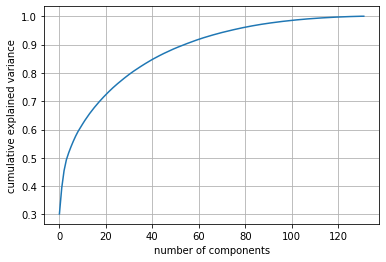

In [570]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [633]:
# =======================
# test set
# =======================


start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_lr03_x_test03)

# Dimension reduction
pca = PCA(n_components=0.75)
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print ("Components:",pca.n_components_)

pred = cross_val_predict(log_reg12, x_train_scaled_reduced, y_test03, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(y_test03, pred))
print(classification_report(y_test03, pred))

Components: 13
Times:  0.5625
Confusion matrix: 
 [[16  5]
 [ 3 10]]
              precision    recall  f1-score   support

         2.0       0.84      0.76      0.80        21
         3.0       0.67      0.77      0.71        13

    accuracy                           0.76        34
   macro avg       0.75      0.77      0.76        34
weighted avg       0.78      0.76      0.77        34



Text(0, 0.5, 'cumulative explained variance')

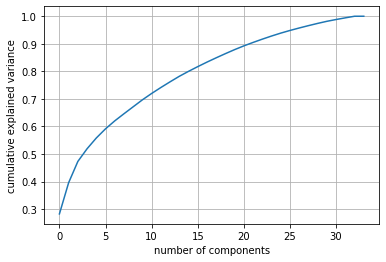

In [631]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

<hr style="border:px solid black"> </hr>

## 4.3.3 Decision Tree
- __Baseline__

In [473]:
# =======================
# Training set
# Male ( MCI VS. AD )
# =======================


tree_clf09 = DecisionTreeClassifier(random_state=42)
start = time.process_time()
tree_clf09.fit(x_train03, y_train03)

pred = cross_val_predict(tree_clf09, x_train03, y_train03, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train03, pred))
print(classification_report(y_train03, pred))

Time:  0.1875
[[58 22]
 [17 35]]
              precision    recall  f1-score   support

         2.0       0.77      0.72      0.75        80
         3.0       0.61      0.67      0.64        52

    accuracy                           0.70       132
   macro avg       0.69      0.70      0.70       132
weighted avg       0.71      0.70      0.71       132



In [474]:
# =======================
# Testing set
# Male ( MCI VS. AD )
# =======================


start = time.process_time()

pred = cross_val_predict(tree_clf09, x_test03, y_test03, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test03, pred))
print(classification_report(y_test03, pred))

Time:  0.09375
[[15  6]
 [ 5  8]]
              precision    recall  f1-score   support

         2.0       0.75      0.71      0.73        21
         3.0       0.57      0.62      0.59        13

    accuracy                           0.68        34
   macro avg       0.66      0.66      0.66        34
weighted avg       0.68      0.68      0.68        34



---
- __Feature Selection - RFECV (Decision Tree)__

Optimal number of features : 327
Time:  0.46875


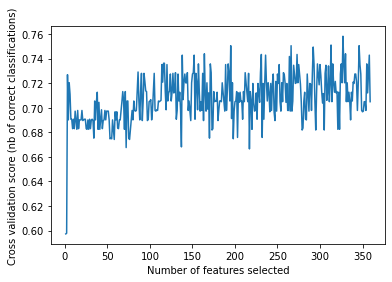

In [85]:
# =======================
# Male ( MCI VS. AD )
# Decision Tree - RFECV
# =======================


tree_clf10 = DecisionTreeClassifier(random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_tree03 = RFECV(estimator=tree_clf10, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_tree03.fit(x_train03, y_train03)
rfecv_tree03_x_train03 = rfecv_tree03.transform(x_train03)
rfecv_tree03_x_test03 = rfecv_tree03.transform(x_test03)


print("Optimal number of features : %d" % rfecv_tree03.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_tree03.grid_scores_) + min_features_to_select),
         rfecv_tree03.grid_scores_)
plt.show()

In [493]:
cols = rfecv_tree03.get_support(indices=True)
x_train_new05 = x_train03.iloc[:,cols]

x_train_new05.columns.values.tolist()      # Optimal feature's name

['lh.inferiorparietal.thickness',
 'lh.inferiortemporal.thickness',
 'lh.isthmuscingulate.thickness',
 'lh.lateraloccipital.thickness',
 'lh.lateralorbitofrontal.thickness',
 'lh.lingual.thickness',
 'lh.medialorbitofrontal.thickness',
 'lh.middletemporal.thickness',
 'lh.parahippocampal.thickness',
 'lh.paracentral.thickness',
 'lh.parsopercularis.thickness',
 'lh.parsorbitalis.thickness',
 'lh.parstriangularis.thickness',
 'lh.pericalcarine.thickness',
 'lh.postcentral.thickness',
 'lh.posteriorcingulate.thickness',
 'lh.precentral.thickness',
 'lh.precuneus.thickness',
 'lh.rostralanteriorcingulate.thickness',
 'lh.rostralmiddlefrontal.thickness',
 'lh.superiorfrontal.thickness',
 'lh.superiorparietal.thickness',
 'lh.superiortemporal.thickness',
 'lh.supramarginal.thickness',
 'lh.frontalpole.thickness',
 'lh.temporalpole.thickness',
 'lh.transversetemporal.thickness',
 'lh.insula.thickness',
 'lh.MeanThickness.thickness',
 'rh.bankssts.thickness',
 'rh.caudalanteriorcingulate.thic

- feature importances

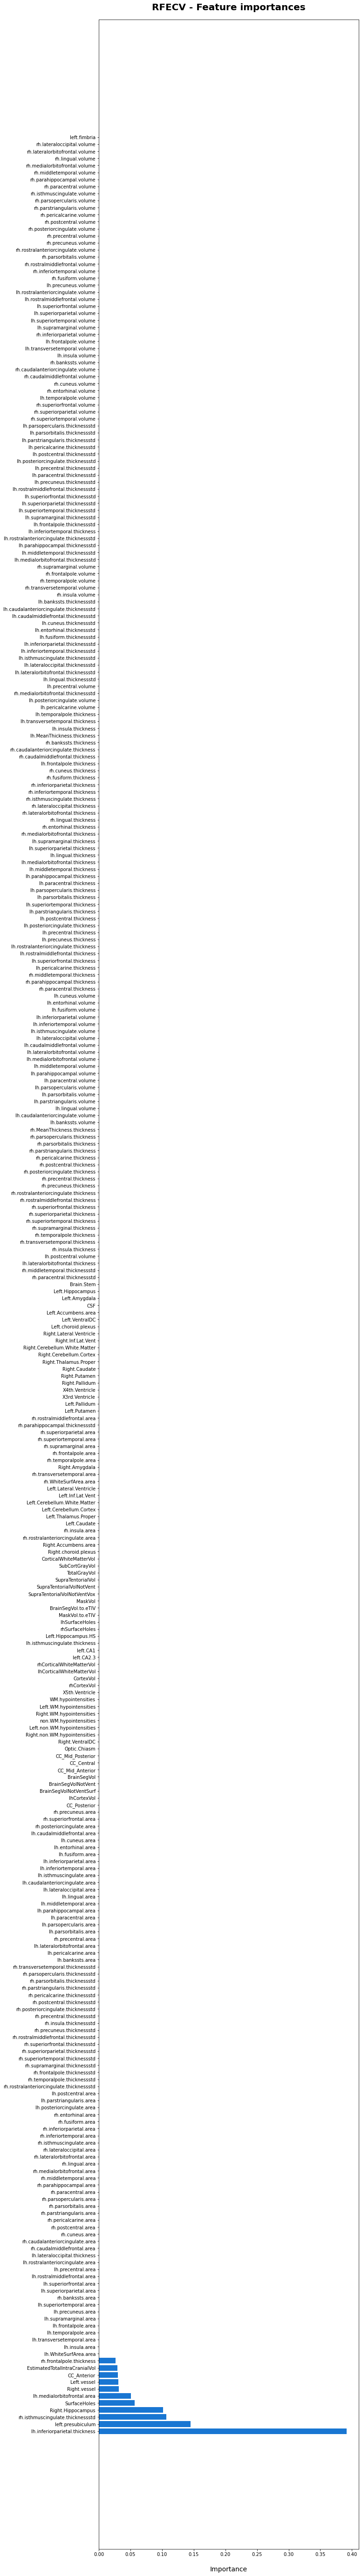

In [494]:
dset = pd.DataFrame()
dset['attr'] = x_train_new05.columns.values
dset['importance'] = rfecv_tree03.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 100))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

---
- __Only use the data after RFECV__

In [495]:
# =========================
# Training set (RFECV)
# Male ( MCI VS. AD )
# =========================


tree_clf11 = DecisionTreeClassifier(random_state=42)
start = time.process_time()
tree_clf11.fit(rfecv_tree03_x_train03, y_train03)

pred = cross_val_predict(tree_clf11, rfecv_tree03_x_train03, y_train03, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train03, pred))
print(classification_report(y_train03, pred))

Time:  0.03125
[[60 20]
 [16 36]]
              precision    recall  f1-score   support

         2.0       0.79      0.75      0.77        80
         3.0       0.64      0.69      0.67        52

    accuracy                           0.73       132
   macro avg       0.72      0.72      0.72       132
weighted avg       0.73      0.73      0.73       132



In [496]:
# =========================
# Testing set (RFECV)
# Male ( MCI VS. AD )
# =========================


start = time.process_time()

pred = cross_val_predict(tree_clf11, rfecv_tree03_x_test03, y_test03, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test03, pred))
print(classification_report(y_test03, pred))

Time:  0.0
[[17  4]
 [ 5  8]]
              precision    recall  f1-score   support

         2.0       0.77      0.81      0.79        21
         3.0       0.67      0.62      0.64        13

    accuracy                           0.74        34
   macro avg       0.72      0.71      0.72        34
weighted avg       0.73      0.74      0.73        34



---
- __RFECV (DT) + Feature scaling + PCA__

In [114]:
# ======================
# Training set
# Female ( MCI VS. AD )
# ======================

tree_clf12 = DecisionTreeClassifier(random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_tree03_x_train03)

# Dimension reduction
#pca = PCA(n_components=0.95)  # n_components
#x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

#print (pca.explained_variance_ratio_)
#print (pca.explained_variance_)
print ("Components:",pca.n_components_)

tree_clf12.fit(x_train_scaled, y_train03)


pred = cross_val_predict(tree_clf12, x_train_scaled, y_train03, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train03, pred))
print(classification_report(y_train03, pred))

Components: 74
Time:  0.125
[[61 19]
 [16 36]]
              precision    recall  f1-score   support

         2.0       0.79      0.76      0.78        80
         3.0       0.65      0.69      0.67        52

    accuracy                           0.73       132
   macro avg       0.72      0.73      0.72       132
weighted avg       0.74      0.73      0.74       132



In [115]:
# =======================
# Testing set
# Female ( MCI VS. AD )
# =======================


start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(rfecv_tree03_x_test03)

# Dimension reduction
#pca = PCA(n_components=0.95)
#x_test_scaled_reduced = pca.fit_transform(x_test_scaled)

print ("Components:",pca.n_components_)

# confusion matrix
pred = cross_val_predict(tree_clf12, x_test_scaled, y_test03, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test03, pred))
print(classification_report(y_test03, pred))

Components: 74
Time:  0.046875
[[17  4]
 [ 5  8]]
              precision    recall  f1-score   support

         2.0       0.77      0.81      0.79        21
         3.0       0.67      0.62      0.64        13

    accuracy                           0.74        34
   macro avg       0.72      0.71      0.72        34
weighted avg       0.73      0.74      0.73        34



<hr style="border:px solid black"> </hr>

## 4.3.4 Random Forest
- __Baseline__

In [475]:
# =======================
# Training set
# Male ( MCI VS. AD )
# =======================


start = time.process_time()
forest_clf09 = RandomForestClassifier(random_state=42)
forest_clf09.fit(x_train03, y_train03)

pred = cross_val_predict(forest_clf09, x_train03, y_train03, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train03, pred))
print(classification_report(y_train03, pred))

Time:  1.6875
[[70 10]
 [20 32]]
              precision    recall  f1-score   support

         2.0       0.78      0.88      0.82        80
         3.0       0.76      0.62      0.68        52

    accuracy                           0.77       132
   macro avg       0.77      0.75      0.75       132
weighted avg       0.77      0.77      0.77       132



In [476]:
# =======================
# Testing set
# Male ( MCI VS. AD )
# =======================

start = time.process_time()

pred = cross_val_predict(forest_clf09, x_test03, y_test03, cv=10)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test03, pred))
print(classification_report(y_test03, pred))

Time:  1.1875
[[18  3]
 [ 6  7]]
              precision    recall  f1-score   support

         2.0       0.75      0.86      0.80        21
         3.0       0.70      0.54      0.61        13

    accuracy                           0.74        34
   macro avg       0.72      0.70      0.70        34
weighted avg       0.73      0.74      0.73        34



---
- __Feature Selection - RFECV (Random Forest)__

Optimal number of features : 108
Time:  37.0625


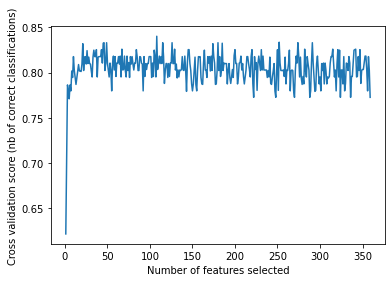

In [116]:
# =======================
# Male ( MCI VS. AD )
# Random Forest - RFECV
# =======================


forest_clf10 = RandomForestClassifier(random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_forest03 = RFECV(estimator=forest_clf10, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_forest03.fit(x_train03, y_train03)
rfecv_forest03_x_train03 = rfecv_forest03.transform(x_train03)
rfecv_forest03_x_test03 = rfecv_forest03.transform(x_test03)


print("Optimal number of features : %d" % rfecv_forest03.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_forest03.grid_scores_) + min_features_to_select),
         rfecv_forest03.grid_scores_)
plt.show()

In [478]:
cols = rfecv_forest03.get_support(indices=True)
x_train_new06 = x_train03.iloc[:,cols]

x_train_new06.columns.values.tolist()      # Optimal feature's name

['lh.bankssts.thickness',
 'lh.caudalanteriorcingulate.thickness',
 'lh.entorhinal.thickness',
 'lh.inferiorparietal.thickness',
 'lh.inferiortemporal.thickness',
 'lh.isthmuscingulate.thickness',
 'lh.medialorbitofrontal.thickness',
 'lh.postcentral.thickness',
 'lh.precentral.thickness',
 'lh.precuneus.thickness',
 'lh.superiorparietal.thickness',
 'lh.supramarginal.thickness',
 'lh.temporalpole.thickness',
 'lh.insula.thickness',
 'lh.MeanThickness.thickness',
 'rh.bankssts.thickness',
 'rh.caudalmiddlefrontal.thickness',
 'rh.entorhinal.thickness',
 'rh.fusiform.thickness',
 'rh.inferiorparietal.thickness',
 'rh.inferiortemporal.thickness',
 'rh.isthmuscingulate.thickness',
 'rh.lateraloccipital.thickness',
 'rh.middletemporal.thickness',
 'rh.precuneus.thickness',
 'rh.rostralmiddlefrontal.thickness',
 'rh.superiorparietal.thickness',
 'rh.superiortemporal.thickness',
 'rh.supramarginal.thickness',
 'rh.MeanThickness.thickness',
 'lh.bankssts.volume',
 'lh.caudalanteriorcingulate.

- feature importances

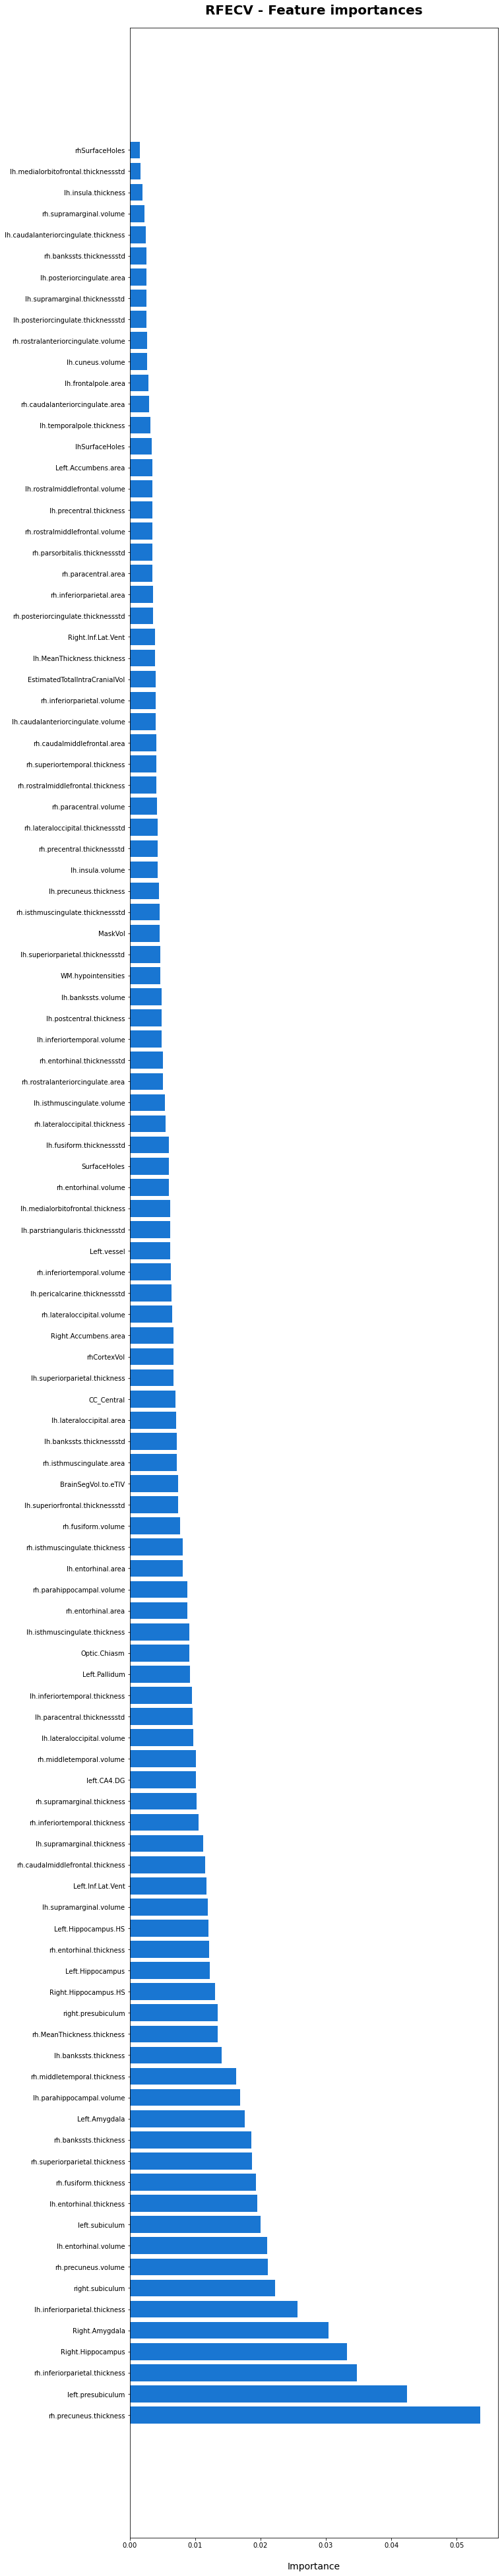

In [479]:
dset = pd.DataFrame()
dset['attr'] = x_train_new06.columns.values
dset['importance'] = rfecv_forest03.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 70))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

---
- __Only use the data after RFECV__

In [666]:
# =======================
# Training set (RFECV)
# Male ( MCI VS. AD )
# =======================


forest_clf11 = RandomForestClassifier(random_state=42)
start = time.process_time()
forest_clf11.fit(rfecv_forest03_x_train03, y_train03)

pred = cross_val_predict(forest_clf11, rfecv_forest03_x_train03, y_train03, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train03, pred))
print(classification_report(y_train03, pred))

Time:  0.203125
[[71  9]
 [14 38]]
              precision    recall  f1-score   support

         2.0       0.84      0.89      0.86        80
         3.0       0.81      0.73      0.77        52

    accuracy                           0.83       132
   macro avg       0.82      0.81      0.81       132
weighted avg       0.82      0.83      0.82       132



In [667]:
# =======================
# Testing set (RFECV)
# Male ( MCI VS. MCI )
# =======================


start = time.process_time()

pred = cross_val_predict(forest_clf11, rfecv_forest03_x_test03, y_test03, cv=10,  n_jobs=-1)

print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test03, pred))
print(classification_report(y_test03, pred))

Time:  0.03125
[[19  2]
 [ 6  7]]
              precision    recall  f1-score   support

         2.0       0.76      0.90      0.83        21
         3.0       0.78      0.54      0.64        13

    accuracy                           0.76        34
   macro avg       0.77      0.72      0.73        34
weighted avg       0.77      0.76      0.75        34



---
- __RFECV (RF) + Feature scaling + PCA__

In [128]:
# ======================
# Training set
# Female ( CN VS. MCI )
# ======================

forest_clf12 = RandomForestClassifier(random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_forest03_x_train03)

# Dimension reduction
pca = PCA(n_components=3)  # n_components
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

#print (pca.explained_variance_ratio_)
#print (pca.explained_variance_)
print ("Components:",pca.n_components_)

forest_clf12.fit(x_train_scaled_reduced, y_train03)


pred = cross_val_predict(forest_clf12, x_train_scaled_reduced, y_train03, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_train03, pred))
print(classification_report(y_train03, pred))

Components: 3
Time:  3.53125
[[68 12]
 [17 35]]
              precision    recall  f1-score   support

         2.0       0.80      0.85      0.82        80
         3.0       0.74      0.67      0.71        52

    accuracy                           0.78       132
   macro avg       0.77      0.76      0.77       132
weighted avg       0.78      0.78      0.78       132



In [127]:
# =======================
# Testing set
# Female ( CN VS. MCI )
# =======================


start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(rfecv_forest03_x_test03)

# Dimension reduction
pca = PCA(n_components=3)
x_test_scaled_reduced = pca.fit_transform(x_test_scaled)

print ("Components:",pca.n_components_)

# confusion matrix
pred = cross_val_predict(forest_clf12, x_test_scaled_reduced, y_test03, cv=10)


print("Time: ", time.process_time() - start)
print(confusion_matrix(y_test03, pred))
print(classification_report(y_test03, pred))

Components: 3
Time:  2.6875
[[17  4]
 [ 2 11]]
              precision    recall  f1-score   support

         2.0       0.89      0.81      0.85        21
         3.0       0.73      0.85      0.79        13

    accuracy                           0.82        34
   macro avg       0.81      0.83      0.82        34
weighted avg       0.83      0.82      0.83        34

